# imports and definitions:

## Imports:

In [3]:
# system & general:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import cPickle as pickle
import os
import re
import time

# data analysis and statistics:
import pandas as pd
import numpy as np
from scipy import stats
import random
from scipy.stats import pearsonr,fisher_exact,mannwhitneyu
import math
from scipy.spatial.distance import braycurtis, pdist, euclidean

# figures:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
# from PNPChip.ForPaper.Figures.nature_guidline_utils import m2inch
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

#my functions:
from ShaniBA.myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot, adjusted_roundup
from ShaniBA.MyFunctionsShani import *
from ShaniBA.GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from ShaniBA.SampleLists.SampleFileFunctions import *
from ShaniBA.PhenotypicData.PhenotypeGenerationFunctions import *
from ShaniBA.CardioProject.CardioFunctions import *
from ShaniBA.PredictionPipeline.PredictionFunctions import *
from ShaniBA.TCR_feature_generation.SubsamplingFunctions import *
from ShaniBA.CardioProject.Figures.GeneralFigureFunctions import *


#ML imports:
from xgboost import XGBClassifier
import lightgbm as lgb
from collections import OrderedDict, Counter
from sklearn.model_selection import GroupKFold,StratifiedKFold, KFold
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression
import shap
from sklearn import metrics, preprocessing
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel,SelectKBest,chi2,mutual_info_classif,f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *


stop
done1
stop
done
done
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Definitions:

In [183]:
#####path definitions:
MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126

FIG1_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Presentations and Manuscripts/CardioTCR paper/FigureDraft_Jan19/\
Fig1_AgeGenderPrediction/'
SUPP_FIG_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Presentations and Manuscripts/CardioTCR paper/FigureDraft_Jan19/\
supp_figs/'
PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
FEATURES_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/'
SAMPLE_LIST_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/'
CARDIO_PHEN_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/'
FIGURE_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Presentations and Manuscripts/GMs and JCs/JC-310319/'

##### general definitions:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)
np.set_printoptions(precision=4, linewidth=200)

cdate=str(time.strftime("%d%m%Y"))
cdate

'26032019'

# get old feature df's used - corrected and not corrected

In [3]:
oldFeatureDF=pd.read_pickle(FEATURES_DIR+'allTCRfeatures_percShared10__withRels_noT.dat')
print oldFeatureDF.shape
oldFeatureDF.iloc[:6,:6]

(656, 147)


,AA count_0,AA count_1,NT count_0,NT count_1,berger_aa_0,berger_aa_1
BD406,190.0,8017.0,2378.0,8241.0,0.047619,0.012112
BD228,357.0,12365.0,3869.0,12884.0,0.019465,0.002883
BD714,208.0,10560.0,2445.0,10995.0,0.108108,0.030374
BD808,359.0,19513.0,4622.0,20257.0,0.053691,0.013441
BD144,356.0,15629.0,4593.0,17269.0,0.031320,0.024976
BD617,235.0,10135.0,2795.0,10600.0,0.027682,0.016238


In [4]:
oldFeatureDF_corr=pd.read_pickle(FEATURES_DIR+'allTCRfeatures_percShared10__withRels_noT_AgeCorr_Gender_MaleCorr01.dat')
print oldFeatureDF_corr.shape
oldFeatureDF_corr.iloc[:6,:6]
# .loc[:,oldFeatureDF.columns]

(656, 147)


,cdr3Length_mean_1,d3Deletion_mean_0,d3Deletion_std_0,d5Deletion_mean_0,d5Deletion_mean_1,d5Deletion_std_0
BD406,43.849290,3.252313,2.687372,3.620269,3.867856,2.953297
BD228,43.906318,3.388731,2.668487,3.586715,3.747749,2.967776
BD714,43.485130,3.278937,2.692033,3.757873,3.867758,3.010800
BD808,43.812114,3.363263,2.723223,3.609260,3.804166,2.991017
BD144,43.639412,3.219682,2.726473,3.670586,3.756790,3.036817
BD617,43.640094,3.370662,2.718477,3.718426,3.827264,2.992439


In [5]:
oldFeatureDF['AA count_0'].head()

BD406    190.0
BD228    357.0
BD714    208.0
BD808    359.0
BD144    356.0
Name: AA count_0, dtype: float64

In [6]:
oldFeatureDF_corr['AA count_0_AgeCorrRes_Gender_MaleCorrRes'].head()

BD406    -51.600506
BD228    100.279969
BD714    -35.054376
BD808     41.262274
BD144     57.784638
Name: AA count_0_AgeCorrRes_Gender_MaleCorrRes, dtype: float64

In [7]:
oldVDJ_DF=pd.read_pickle(FEATURES_DIR+'VDJ_no0-01rare.dat')
print oldVDJ_DF.shape
oldVDJ_DF.iloc[:6,:6]

(656, 268)


,V04_0,V05_0,V06_0,V07_0,V10_0,V11_0
BD406,0.077337,0.123739,0.092132,0.141896,0.050437,0.044385
BD228,0.063699,0.095141,0.097591,0.142099,0.054716,0.044916
BD714,0.064164,0.120137,0.107167,0.152218,0.049147,0.033447
BD808,0.061148,0.132737,0.096943,0.165548,0.058538,0.047726
BD144,0.070182,0.142807,0.119064,0.141061,0.059707,0.047835
BD617,0.058962,0.127948,0.120873,0.136792,0.057193,0.038915


In [8]:
oldVDJ_DF_corr=pd.read_pickle(FEATURES_DIR+'VDJ_no0-01rare_AgeCorr_Gender_MaleCorr01.dat')
print oldVDJ_DF_corr.shape
oldVDJ_DF_corr.iloc[:6,:6]

(656, 268)


,V04_0,V05_0,V06_0,V07_0,V10_0,V12_0
BD406,0.077337,0.123739,0.092132,0.141896,0.050437,0.030262
BD228,0.063699,0.095141,0.097591,0.142099,0.054716,0.031850
BD714,0.064164,0.120137,0.107167,0.152218,0.049147,0.030717
BD808,0.061148,0.132737,0.096943,0.165548,0.058538,0.032811
BD144,0.070182,0.142807,0.119064,0.141061,0.059707,0.035615
BD617,0.058962,0.127948,0.120873,0.136792,0.057193,0.029481


In [9]:
newDF=pd.read_pickle(FEATURES_DIR+'X_withPredictedAgeGender.dat')
print newDF.shape
newDF.iloc[:6,:6]

(656, 408)


,AA count_0,AA count_1,NT count_0,NT count_1,berger_aa_0,berger_aa_1
BD406,190.0,8017.0,2378.0,8241.0,0.047619,0.012112
BD228,357.0,12365.0,3869.0,12884.0,0.019465,0.002883
BD714,208.0,10560.0,2445.0,10995.0,0.108108,0.030374
BD808,359.0,19513.0,4622.0,20257.0,0.053691,0.013441
BD144,356.0,15629.0,4593.0,17269.0,0.031320,0.024976
BD617,235.0,10135.0,2795.0,10600.0,0.027682,0.016238


In [10]:
newDF_corr=pd.read_pickle(FEATURES_DIR+'X_withPredictedAgeGender_AgeCorrRes.dat')
print newDF_corr.shape
newDF_corr.iloc[:6,:6]

(656, 408)


,cdr3Length_mean_0,cdr3Length_mean_1,count (templates)_max_0,d5Deletion_mean_0,d5Deletion_mean_1,d5Deletion_std_0
BD406,46.414634,43.849290,15.0,3.620269,3.867856,2.953297
BD228,47.004652,43.906318,28.0,3.586715,3.747749,2.967776
BD714,45.232720,43.485130,382.0,3.757873,3.867758,3.010800
BD808,46.155560,43.812114,24.0,3.609260,3.804166,2.991017
BD144,46.254953,43.639412,164.0,3.670586,3.756790,3.036817
BD617,45.740250,43.640094,140.0,3.718426,3.827264,2.992439


# correct new x using regression:

## functions:

In [11]:
#check which feature needs correction:
def check_features_to_correct(X,phenotypeDF,phen,featureDFname=None,sampleSubset=None,calcAssociations=True,FDR=0.25):
    
    #definitions:
    featureDF=X.copy()
    phenotypeDF = pd.DataFrame(phenotypeDF[phen])
    if sampleSubset is not None:
        featureDF=featureDF.loc[sampleSubset,:]
        phenotypeDF = phenotypeDF.loc[sampleSubset,:]
    if featureDFname is None:
        featureDFname='all'
    phenDFname=phen
    testType='pearson'
    
    print ('phenotype series type:',phenotypeDF[phen].dtype)
    
    if phenotypeDF[phen].nunique()==2:
        f1='%s/TCR_real_data/TCR_phenotype_relations/%sTCRfeatures_%s_ttest.xlsx' %(MyPath,featureDFname,phenDFname)
    elif phenotypeDF[phen].nunique()>2:
        f1='%s/TCR_real_data/TCR_phenotype_relations/%sTCRfeatures_%s_%sTest.xlsx' %(MyPath,featureDFname,phenDFname,testType)       
      
    if calcAssociations:
        print 'checking associations between %s and all TCR features:' %phen
        if phenotypeDF[phen].nunique()==2:
            print 'number of phenotype unique values is %s and therefore ttest is used' %phenotypeDF[phen].nunique()
            feature_phen_assoc=calc_catPhens_TCRfeatures_associations_ttest(featureDF,featureDFname,phenotypeDF,phenDFname,FDR)
        elif phenotypeDF[phen].nunique()>2:
            print 'number of phenotype unique values is %s and therefore correlation test is used' %phenotypeDF[phen].nunique()
            feature_phen_assoc=calc_numPhens_TCRfeatures_associations_correlation(featureDF,featureDFname,phenotypeDF,phenDFname,testType,FDR)
        feature_phen_assoc.to_excel(f1)
    else:
        feature_phen_assoc=pd.read_excel(f1)
        
    #CHECK WHICH FEATURES TO CORRECT:
    sigDF=feature_phen_assoc[feature_phen_assoc['sig. by FDR=%s' %FDR]==1]
    featToCorrect=sigDF['Feature'].unique().tolist()
    print ('number of features to correct is:',len(featToCorrect))
    print ('the most significantly associated features are:',sigDF['Feature'].unique().tolist()[:5])
    
    return featToCorrect

# regress feature using phenotype data and generate the resulting residuals:
# the function should take feature data and phenotype data for PNP530+Cardio126!!!!

def calc_residuals(feature_data,phen_data,featureName,sampleSubset,toPlot=True):
    lm=LinearRegression()
    lm.fit(phen_data.loc[sampleSubset,:],feature_data.loc[sampleSubset,:])
    y_pred=pd.DataFrame(index=phen_data.index.tolist(),data=lm.predict(phen_data))
    
    merged=pd.merge(feature_data,y_pred,how='inner',left_index=True, right_index=True)
    merged['res']=merged[featureName]-merged[0]
    print ('sum of residuals for the fitted data only:', merged.loc[sampleSubset,'res'].sum())
    
    ###plot:
    if toPlot:
        fig1,ax1=plt.subplots()
        ax1.scatter(phen_data.loc[sampleSubset,:],feature_data.loc[sampleSubset,:],c='blue',s=50)
        ax1.plot(phen_data.loc[sampleSubset,:],y_pred.loc[sampleSubset,:],c='black',lw=3)
        ax1.set_title('Linear regression - '+featureName)
        plt.show()
        
        fig2,ax2=plt.subplots()
        ax2.hist(feature_data.loc[sampleSubset,featureName],color='grey',bins=25)
        ax2.set_title('Value distribution - '+featureName)
        plt.show()
        
        fig3,ax3=plt.subplots()
        ax3.hist(merged['res'], color='grey',bins=25)
        ax3.set_title('Residual Value distribution - '+featureName)
        plt.show()
    
#     print merged.head(10)
    print merged[featureName].median()
    return merged['res']
        
    

In [12]:
f2=PRED_RESULTS_DIR+'TargetDFs/PNP530Cardio126_AgeGender.xlsx'
phenotypeDF=pd.read_excel(f2).set_index('BD').loc[PNP530Cardio126,:]
phenotypeDF.columns.tolist()

[u'Gender_Male', u'Age']

In [13]:
df=pd.read_pickle('%s/TCR_real_data/Predictions/featureDFs/X_withPredictedAgeGender.dat' %MyPath)
df.shape

(656, 408)

## correct newX

('original X shape is:', (656, 408))
       AA count_0  AA count_1  NT count_0  NT count_1
BD406       190.0      8017.0      2378.0      8241.0
BD228       357.0     12365.0      3869.0     12884.0
BD714       208.0     10560.0      2445.0     10995.0
BD808       359.0     19513.0      4622.0     20257.0
('phenotype DF shape is:', (656, 2))
       Gender_Male   Age
BD                      
BD406            0  65.0
BD228            1  32.0
BD714            1  39.0
BD808            0  26.0
checking which features need correction for age:
('phenotype series type:', dtype('float64'))
checking associations between Age and all TCR features:
number of phenotype unique values is 50 and therefore correlation test is used
('number of features to correct is:', 164)
('the most significantly associated features are:', ['Age', 'V06-04_1', 'top1000clonal_aa_1', 'PC2', 'V06_J02_1'])
0 AA count_0
('sum of residuals for the fitted data only:', 2.3646862246096134e-11)


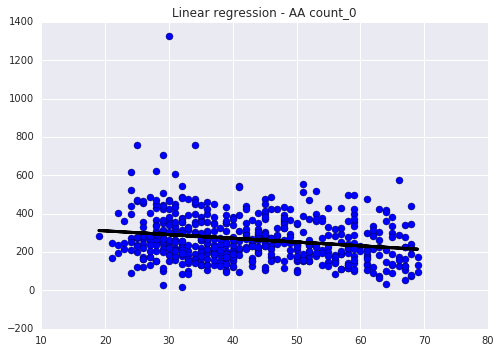

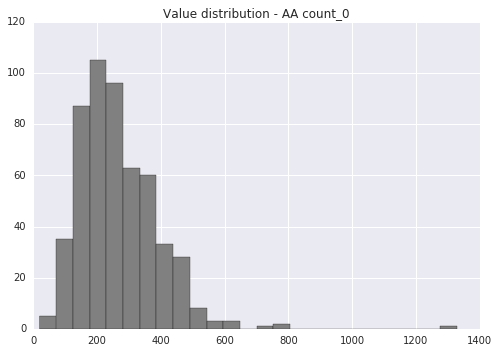

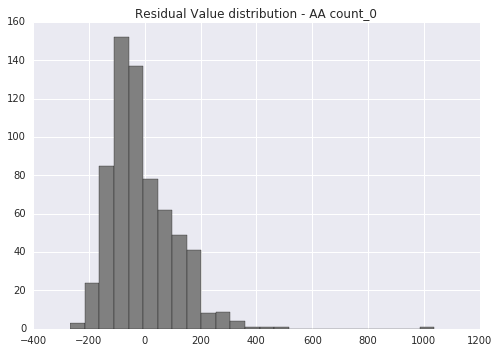

229.0
1 AA count_1
('sum of residuals for the fitted data only:', 1.3387762010097504e-09)


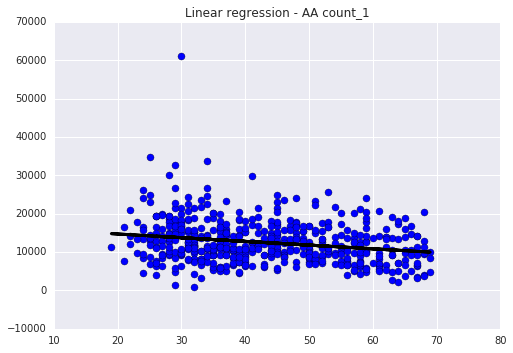

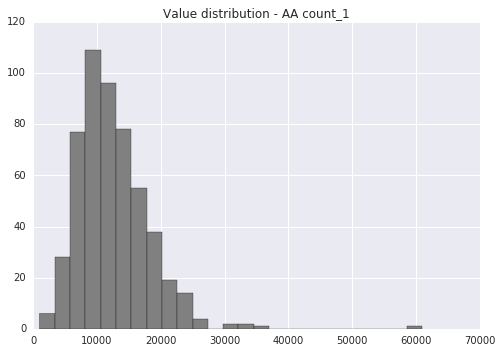

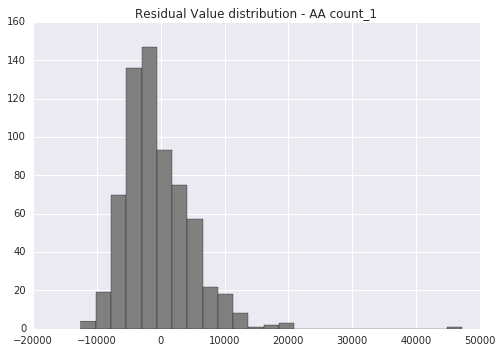

10847.0
2 NT count_0
('sum of residuals for the fitted data only:', -1.9281287677586079e-10)


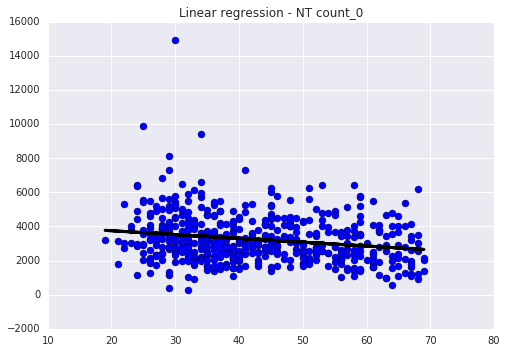

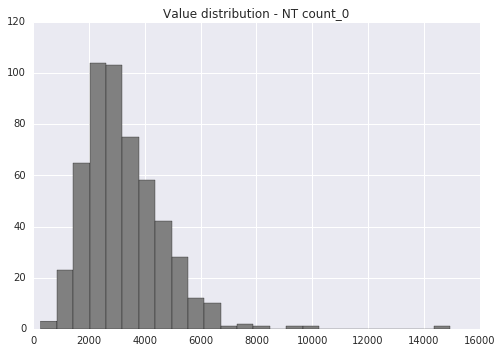

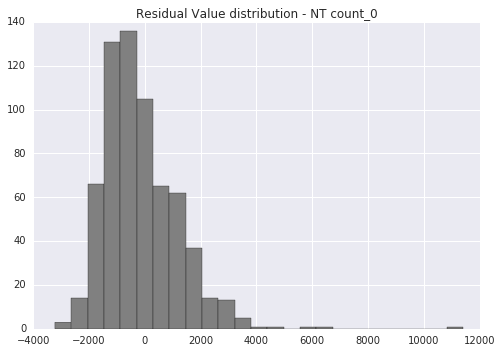

2792.0
3 NT count_1
('sum of residuals for the fitted data only:', -6.548361852765083e-10)


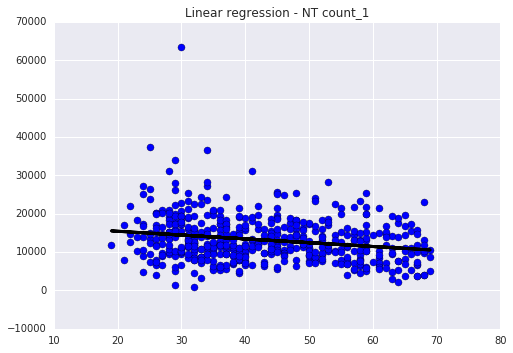

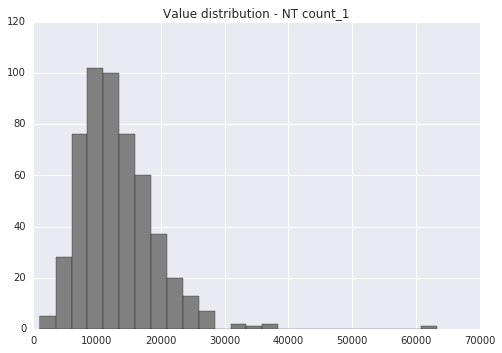

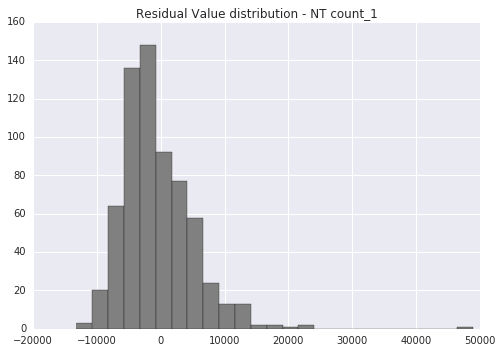

11407.5
4 berger_aa_0
('sum of residuals for the fitted data only:', -5.773159728050814e-15)


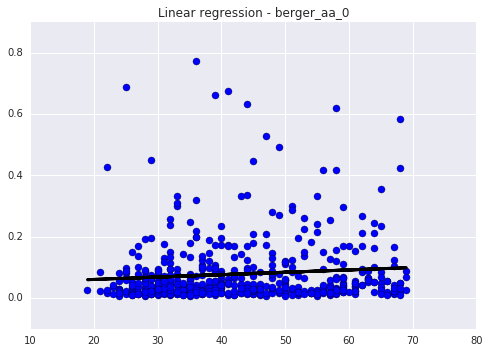

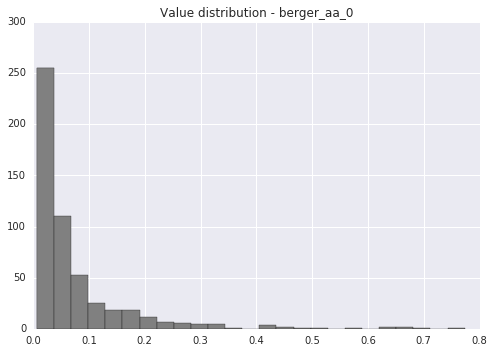

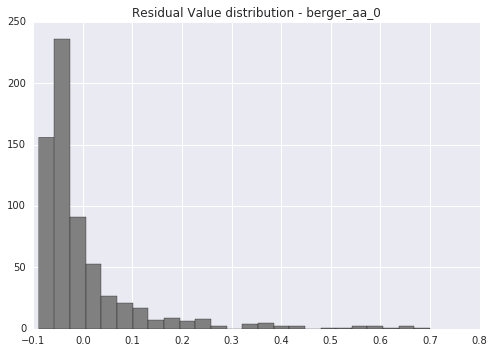

0.042618059159315
5 berger_aa_1
('sum of residuals for the fitted data only:', 1.1102230246251565e-16)


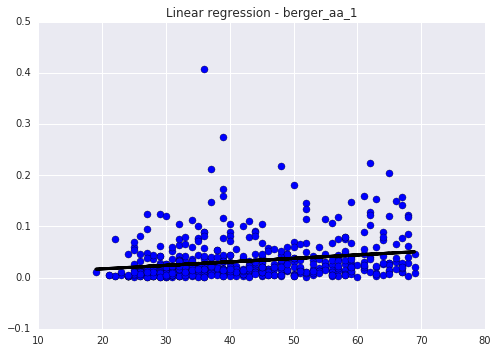

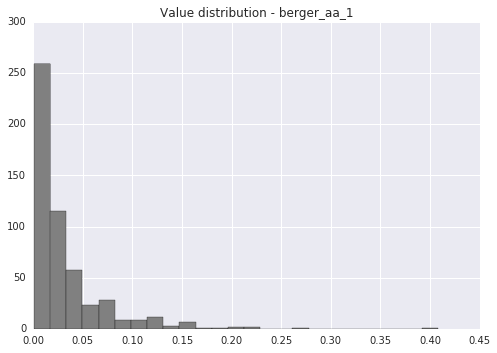

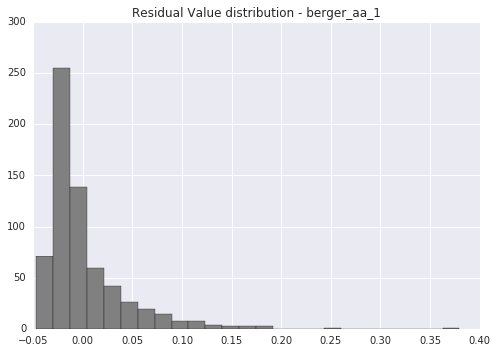

0.020202775740389055
6 berger_nt_0
('sum of residuals for the fitted data only:', -1.6653345369377348e-15)


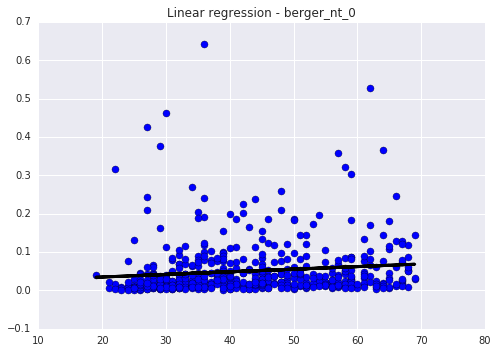

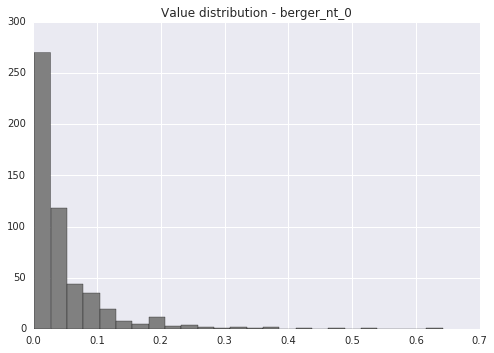

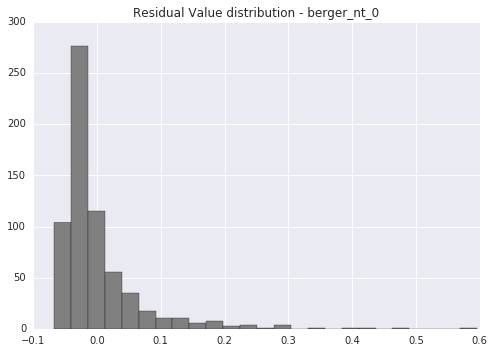

0.030067626593237133
7 cdr3Length_max_0
('sum of residuals for the fitted data only:', -4.334310688136611e-12)


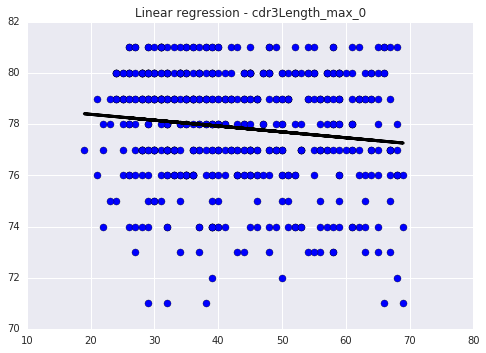

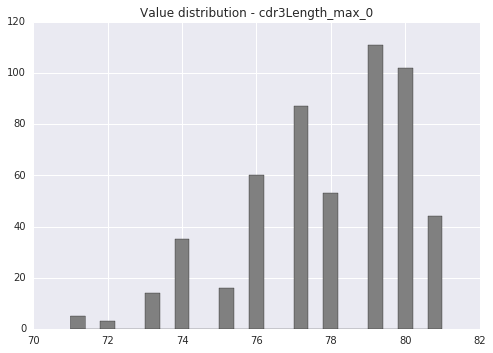

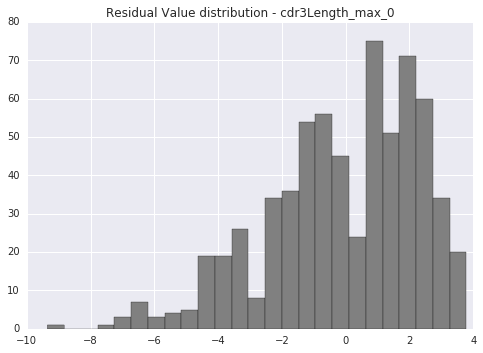

78.0
8 cdr3Length_max_1
('sum of residuals for the fitted data only:', -4.078515303262975e-12)


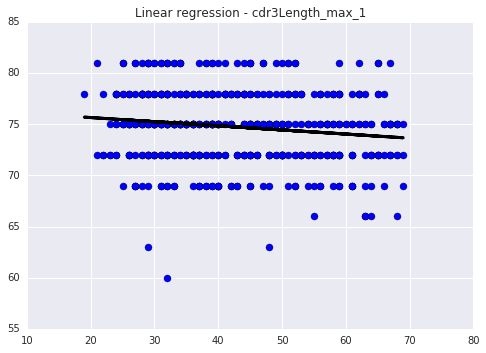

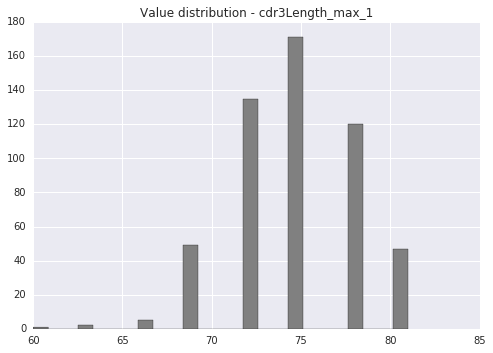

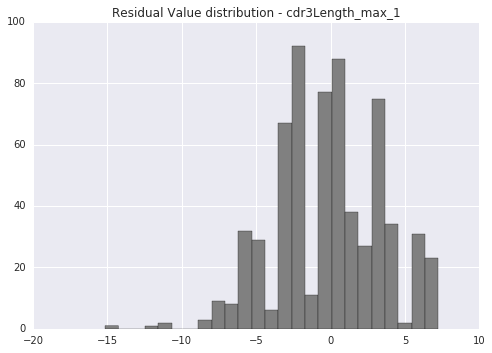

75.0
9 cdr3Length_mean_0
10 cdr3Length_mean_1
11 cdr3Length_std_0
('sum of residuals for the fitted data only:', 4.085620730620576e-14)
7.497194694927561
12 cdr3Length_std_1
('sum of residuals for the fitted data only:', -1.6697754290362354e-13)
5.3748856866642765
13 count (templates)_max_0
14 count (templates)_max_1
('sum of residuals for the fitted data only:', -1.2732925824820995e-11)
306.0
15 count (templates)_mean_0
('sum of residuals for the fitted data only:', -7.460698725481052e-14)
1.2783821446290995
16 count (templates)_mean_1
('sum of residuals for the fitted data only:', 3.086420008457935e-14)
1.3223849120132054
17 count (templates)_std_0
('sum of residuals for the fitted data only:', 5.684341886080802e-14)
2.7888706049866103
18 count (templates)_std_1
('sum of residuals for the fitted data only:', -1.1368683772161603e-13)
4.185097141196431
19 d3Deletion_mean_0
('sum of residuals for the fitted data only:', -1.865174681370263e-14)
3.3446049178154826
20 d3Deletion_mean_1
('s

('sum of residuals for the fitted data only:', -2.699229728619912e-15)
0.02181592370545859
157 V04-01_0
158 V04-02_0
159 V04-03_0
160 V05-01_0
('sum of residuals for the fitted data only:', 6.661338147750939e-16)
0.05727210202552484
161 V05-03_0
162 V05-04_0
163 V05-05_0
164 V05-06_0
165 V05-08_0
166 V06-01_0
167 V06-04_0
168 V06-05_0
169 V06-06_0
170 V06-07_0
171 V06-08_0
172 V06-09_0
173 V07-02_0
174 V07-03_0
175 V07-04_0
176 V07-05_0
177 V07-06_0
('sum of residuals for the fitted data only:', 7.355227538141662e-16)
0.010755732534492628
178 V07-07_0
('sum of residuals for the fitted data only:', 2.393918396847994e-16)
0.008563072920535339
179 V07-08_0
180 V07-09_0
181 V09-01_0
182 V10-01_0
183 V10-02_0
184 V10-03_0
185 V11-01_0
186 V11-02_0
187 V11-03_0
188 V12-01_0
189 V12-02_0
190 V12-05_0
191 V13-01_0
192 V14-01_0
193 V15-01_0
194 V18-01_0
195 V19-01_0
196 V20-01_0
197 V27-01_0
198 V28-01_0
('sum of residuals for the fitted data only:', -1.0269562977782698e-15)
0.03189798021138290

345 V02_J02_1
('sum of residuals for the fitted data only:', -1.5681900222830336e-15)
0.03142455607394312
346 V04_J01_1
347 V04_J02_1
('sum of residuals for the fitted data only:', 5.689893001203927e-16)
0.047094743341149686
348 V05_J01_1
('sum of residuals for the fitted data only:', -2.3800406090401793e-15)
0.047417033101150544
349 V05_J02_1
('sum of residuals for the fitted data only:', 5.218048215738236e-15)
0.10751538134023109
350 V06_J01_1
351 V06_J02_1
('sum of residuals for the fitted data only:', 6.38378239159465e-16)
0.07652849777542148
352 V07_J01_1
('sum of residuals for the fitted data only:', 1.7763568394002505e-15)
0.041411521010295715
353 V07_J02_1
('sum of residuals for the fitted data only:', 5.551115123125783e-17)
0.11210977989090093
354 V09_J01_1
355 V09_J02_1
356 V10_J01_1
('sum of residuals for the fitted data only:', 1.249000902703301e-16)
0.010239676115482812
357 V10_J02_1
358 V11_J01_1
('sum of residuals for the fitted data only:', 3.9898639947466563e-16)
0.010

KeyError: u'Gender_Male'

In [14]:
#PNP530 and Cardio126 samples:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126


#load original X:
f1='%s/TCR_real_data/Predictions/featureDFs/X_withPredictedAgeGender.dat' %MyPath
allFeatures=pd.read_pickle(f1).loc[PNP530Cardio126,:]
print ('original X shape is:', allFeatures.shape)
print allFeatures.iloc[:4,:4]

#load phenotypeDF:
f2=PRED_RESULTS_DIR+'TargetDFs/PNP530Cardio126_AgeGender.xlsx'
phenotypeDF=pd.read_excel(f2).set_index('BD').loc[PNP530Cardio126,:]
print ('phenotype DF shape is:', phenotypeDF.shape)
print phenotypeDF.iloc[:4,:4]

#check which features need correction for age:
print 'checking which features need correction for age:'
X=allFeatures
phen='Age'
sampleSubset=PNP530

featToCorrect=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset)


#correct all featues for age and generate new X:
X_ageCorr=pd.DataFrame(index=X.index, columns=X.columns,data=np.nan)
X_ageCorr=X_ageCorr.loc[PNP530Cardio126,:] #ensure sample order
for n,feature in enumerate(X_ageCorr.columns):
    print n,feature
    if feature in featToCorrect:
        
        phen_data=pd.DataFrame(phenotypeDF['Age'].fillna(phenotypeDF['Age'].median())).loc[PNP530Cardio126,:]
        feature_data=pd.DataFrame(X[feature].fillna(0)) 
        featureName=feature
        
        if n<10: 
            toPlot=True
        else: 
            toPlot=False
        res=calc_residuals(feature_data,phen_data,featureName,PNP530,toPlot=toPlot) #use only PNP530 samples to study
        X_ageCorr=pd.merge(X_ageCorr,pd.DataFrame(res),how='inner',left_index=True, right_index=True)
        X_ageCorr=X_ageCorr.rename(columns={'res':feature+'_AgeCorrRes'})
        X_ageCorr=X_ageCorr.drop(feature,axis=1)
    else:
        X_ageCorr[feature]=X[feature]
print ('X_ageCorr shape after correcting all features is',X_ageCorr.shape)

f3=f1.replace('.dat','_%sCorrRes.dat' %phen)
X_ageCorr.to_pickle(f3)

#check again correlation with age and make sure there are nothing:
print 'checking which features are still corrected for age:'
X=X_ageCorr
phen='Age'
sampleSubset=PNP530
featureDFname='AgeCorrRes'
stillcorrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#check association with gender:
print 'checking which features are now associated with gender:'
X=X_ageCorr
phen='Gender_Male'
sampleSubset=PNP530
featureDFname='AgeCorrRes'
GenderCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)
                   
#correct all featues for gender and generate new X:
X_AgeGenderCorr=pd.DataFrame(index=X.index, columns=X.columns,data=np.nan)
X_AgeGenderCorr=X_AgeGenderCorr.loc[PNP530Cardio126,:] #ensure sample order
for n,feature in enumerate(X_AgeGenderCorr.columns):
    print n,feature
    if feature in GenderCorrrelated:
        
        phen_data=pd.DataFrame(phenotypeDF['Gender_Male'].fillna(phenotypeDF['Gender_Male'].median())).loc[PNP530Cardio126,:]
        feature_data=pd.DataFrame(X[feature].fillna(0)) 
        featureName=feature
        
        res=calc_residuals(feature_data,phen_data,featureName,PNP530) #use only PNP530 samples to study
        X_AgeGenderCorr=pd.merge(X_AgeGenderCorr,pd.DataFrame(res),how='inner',left_index=True, right_index=True)
        X_AgeGenderCorr=X_AgeGenderCorr.rename(columns={'res':feature+'_GenderCorrRes'})
        X_AgeGenderCorr=X_AgeGenderCorr.drop(feature,axis=1)
    else:
        X_AgeGenderCorr[feature]=X[feature]
print ('X_AgeGenderCorr shape after correcting all features is',X_AgeGenderCorr.shape)

f4=f1.replace('.dat','_AgeGenderCorr.dat')
X_AgeGenderCorr.to_pickle(f4)

#check again correlation with age and make sure there are nothing:
print 'checking which features are correlated with age after gender correction:'
X=X_AgeGenderCorr
phen='Age'
sampleSubset=PNP530
featureDFname='AgeGenderCorrRes'
stillcorrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#check association with gender:
print 'checking which features are associated with gender after correction for gender:'
X=X_AgeGenderCorr
phen='Gender_Male'
sampleSubset=PNP530
featureDFname='AgeGenderCorrRes'
GenderCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)


#check association with HbA1C:
print 'checking which features are associated with HbA1C after correction for gender:'
X=X_AgeGenderCorr
phen='HbA1C'
sampleSubset=PNP530
featureDFname='AgeGenderCorrRes'
GenderCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#check association with Glucose:
print 'checking which features are associated with Glucose after correction for gender:'
X=X_AgeGenderCorr
phen='Glucose'
sampleSubset=PNP530
featureDFname='AgeGenderCorrRes'
GenderCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#check association with WakeupGlucose:
print 'checking which features are associated with WakeupGlucose after correction for gender:'
X=X_AgeGenderCorr
phen='WakeupGlucose'
sampleSubset=PNP530
featureDFname='AgeGenderCorrRes'
GlucoseCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#check association with eGFR by CKD-EPI:
print 'checking which features are associated with eGFR by CKD-EPI after correction for gender:'
X=X_AgeGenderCorr
phen='eGFR by CKD-EPI'
sampleSubset=PNP530
featureDFname='AgeGenderCorrRes'
GFRCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#correct all featues for eGFR by CKD-EPI and generate new X:
X_AgeGenderGFRCorr=pd.DataFrame(index=X.index, columns=X.columns,data=np.nan)
X_AgeGenderGFRCorr=X_AgeGenderGFRCorr.loc[PNP530Cardio126,:] #ensure sample order
for n,feature in enumerate(X_AgeGenderGFRCorr.columns):
    print n,feature
    if feature in GFRCorrrelated:
        
        phen_data=pd.DataFrame(phenotypeDF['eGFR by CKD-EPI'].fillna(phenotypeDF['eGFR by CKD-EPI'].median())).loc[PNP530Cardio126,:]
        feature_data=pd.DataFrame(X[feature].fillna(0)) 
        featureName=feature
        
        res=calc_residuals(feature_data,phen_data,featureName,PNP530) #use only PNP530 samples to study
        X_AgeGenderGFRCorr=pd.merge(X_AgeGenderGFRCorr,pd.DataFrame(res),how='inner',left_index=True, right_index=True)
        X_AgeGenderGFRCorr=X_AgeGenderGFRCorr.rename(columns={'res':feature+'_GFRCorrRes'})
        X_AgeGenderGFRCorr=X_AgeGenderGFRCorr.drop(feature,axis=1)
    else:
        X_AgeGenderGFRCorr[feature]=X[feature]
print ('X_AgeGenderGFRCorr shape after correcting all features is',X_AgeGenderCorr.shape)

f5=f1.replace('.dat','_AgeGenderGFRCorr.dat')
X_AgeGenderGFRCorr.to_pickle(f5)

#check again correlation with age and make sure there are nothing:
print 'checking which features are correlated with age after GFR correction:'
X=X_AgeGenderGFRCorr
phen='Age'
sampleSubset=PNP530
featureDFname='AgeGenderGFRCorrRes'
stillcorrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#check association with gender:
print 'checking which features are associated with gender after correction for gender:'
X=X_AgeGenderGFRCorr
phen='Gender_Male'
sampleSubset=PNP530
featureDFname='AgeGenderGFRCorrRes'
GenderCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#check association with HbA1C:
print 'checking which features are associated with HbA1C after correction for gender:'
X=X_AgeGenderGFRCorr
phen='HbA1C'
sampleSubset=PNP530
featureDFname='AgeGenderGFRCorrRes'
GenderCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#check association with Glucose:
print 'checking which features are associated with Glucose after correction for gender:'
X=X_AgeGenderGFRCorr
phen='Glucose'
sampleSubset=PNP530
featureDFname='AgeGenderGFRCorrRes'
GenderCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#check association with GFR:
print 'checking which features are associated with Glucose after correction for gender:'
X=X_AgeGenderGFRCorr
phen='eGFR by CKD-EPI'
sampleSubset=PNP530
featureDFname='AgeGenderGFRCorrRes'
GenderCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#use old X and new X for predictions:
print 'done'



## conclusions from this part

the function didn't work properly but it did generate an age-corrected version and I'll use it.
I tried to use the designated module I wrote for this purpose but for some unknown reason it is executed with no error but doesn't correct anything...

# PREDICTIONS

## Predict isCardio using corrected and not corrected

Done!

### plot isCardio prediction by old feature matrix:

In [16]:
def plot_phen_prediction_ROC_PR_general(ax,phen,phenFile,pred_dir,toAnnotateROCPR=True,toAnnotatePrevalence=True,pos_label = 1,
                                       PrevalenceFontsize='small',annotateFontSize='medium'):
    
    ### if toAnnotate
    
    #get pred_proba data for phenotype
    phen_pred_proba = pd.read_pickle(pred_dir + 'predictions_df.pkl').astype('float').rename(columns={phen:'pred_proba'})
#     print 'phen_pred_proba.columns:'
#     print phen_pred_proba.columns
    phen_pred_proba=pd.DataFrame(phen_pred_proba['pred_proba'])
#     print phen_pred_proba.head()
    
    # get phenotype data
    try:
        phenDF = pd.read_excel(phenFile).set_index('BD').astype('float')
    except:
        try:
            phenDF = pd.read_pickle(phenFile).set_index('BD').astype('float')
        except:
            phenDF = pd.read_pickle(phenFile).astype('float')

    merged = pd.merge(phenDF, phen_pred_proba, how='inner', left_index=True, right_index=True)

#     print 'merged'
#     print merged.head()

    # #plot:
    
    ax, inset_axes,roc_auc, pr_auc, prevalence = plot_ROC_PR_AUC(y=pd.DataFrame(merged[phen.replace(' ','')]), y_pred_df=pd.DataFrame(merged['pred_proba']),
                                    ax=ax, color1='darkred', color2='grey', ticklabelsize=mpl.rcParams['xtick.labelsize'],
                                      textsize=mpl.rcParams['font.size'], labelsize=mpl.rcParams['axes.labelsize'], add_texts=False)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    
    if toAnnotateROCPR:
        ax.annotate('ROC AUC=%s\nObserved p=%s\nPR AUC=%s' % (round(roc_auc, 3), pVal, round(pr_auc, 2)), xy=(0.04, 0.98), xycoords='axes fraction',
                 fontsize=annotateFontSize, xytext=(0, 0), textcoords='offset points', fontweight='bold', ha='left', va='top')
    if toAnnotatePrevalence:   
        inset_axes.text(0.01,prevalence-0.01,'Prevalence=%s' %prevalence,transform=inset_axes.transAxes,ha='left',va='top',
                    fontsize=PrevalenceFontsize)
    
    return ax, inset_axes,roc_auc, pr_auc, prevalence

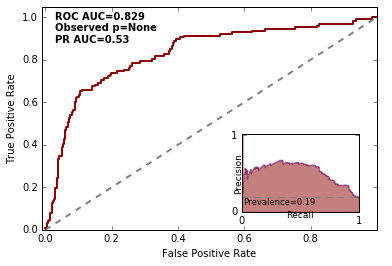

In [18]:
PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
pred_dir=PRED_RESULTS_DIR+'isCardio/XGB_randomSearch_25_byOldTCRfeatureMatrix/'
phen='isCardio'
phenFile=PRED_RESULTS_DIR+'TargetDFs/isCardio.dat'
pVal=None


fig,ax=plt.subplots()

ax, inset_axes,roc_auc, pr_auc, prevalence=plot_phen_prediction_ROC_PR_general(ax,phen,phenFile,pred_dir,toAnnotateROCPR=True,toAnnotatePrevalence=True,pos_label = 1,
                                       PrevalenceFontsize='small',annotateFontSize='medium')

plt.show()

### plot isCardio prediction by old feature matrix with age and gender regressed:

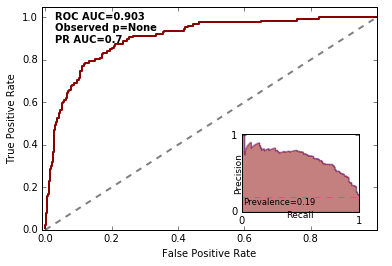

In [19]:
PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
pred_dir=PRED_RESULTS_DIR+'isCardio/XGB_randomSearch_25_byOldTCRfeatureMatrix_ageGenderRegCorr/'
phen='isCardio'
phenFile=PRED_RESULTS_DIR+'TargetDFs/isCardio.dat'
pVal=None


fig,ax=plt.subplots()

ax, inset_axes,roc_auc, pr_auc, prevalence=plot_phen_prediction_ROC_PR_general(ax,phen,phenFile,pred_dir,toAnnotateROCPR=True,toAnnotatePrevalence=True,pos_label = 1,
                                       PrevalenceFontsize='small',annotateFontSize='medium')

plt.show()

## predict age and gender using corrected and not corrected

Done!

### plot Age prediction by old feature matrix:

In [ ]:
the function plot_many_corrs was copied to PredictionFunctions.py

/usr/wisdom/python/lib/python2.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc7abb43110>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


527
527
[([u'True Value (Age)-Predicted Value (Age)'], 0.5606617830549926, 5.881189615526071e-45)]


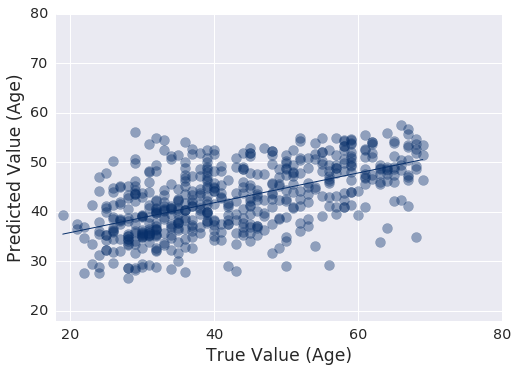

In [15]:
fig,ax = plt.subplots()
sample_list=PNP530
color_map='Blues'
prediction_dir=PRED_RESULTS_DIR+'Age/'
prediction_subdir_list=['XGB_randomSearch_25_byOldTCRfeatureMatrix/']
dataset_name_list = ['Old TCR feature Matrix']

Y_file='%s/TCR_real_data/NewPhenotypicData/PNPage.xlsx' %MyPath
YName='Age'


ax,r_list,p_list,handles_list,labels_list=plot_many_corrs(ax,YName,Y_file,sample_list,color_map,prediction_subdir_list,prediction_dir,
                 dataset_name_list)
# print handles_list
# print labels_list

legend=zip(labels_list,r_list,p_list)
print legend

ax.legend(handles_list,dataset_name_list)
ax.set_xlim(18,80)
ax.set_ylim(18,80)

plt.show()

### plot Age prediction by old feature matrix corrected for age and gender:

527
527
[([u'True Value (Age)-Predicted Value (Age)'], 0.924049888294857, 2.0956220697929567e-221)]


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc7abd063d0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


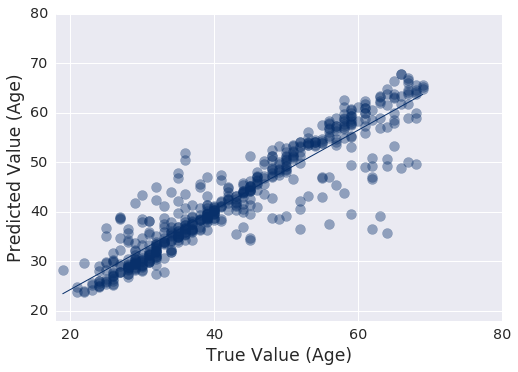

In [16]:
fig,ax = plt.subplots()
sample_list=PNP530
color_map='Blues'
prediction_dir=PRED_RESULTS_DIR+'Age/'
prediction_subdir_list=['XGB_randomSearch_25_byOldTCRfeatureMatrix_ageRegCorr/']
dataset_name_list = ['Old TCR feature Matrix\nAge Corrected']

Y_file='%s/TCR_real_data/NewPhenotypicData/PNPage.xlsx' %MyPath
YName='Age'


ax,r_list,p_list,handles_list,labels_list=plot_many_corrs(ax,YName,Y_file,sample_list,color_map,prediction_subdir_list,prediction_dir,
                 dataset_name_list)
# print handles_list
# print labels_list

legend=zip(labels_list,r_list,p_list)
print legend

ax.legend(handles_list,dataset_name_list)
ax.set_xlim(18,80)
ax.set_ylim(18,80)

plt.show()

### plot corrected and not corrected together:

527
527
527
527
[([u'True Value (Age)-Predicted Value (Age)'], 0.5606617830549926, 5.881189615526071e-45), ([u'True Value (Age)-Predicted Value (Age)', u'True Value (Age)-Predicted Value (Age)'], 0.924049888294857, 2.0956220697929567e-221)]


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc7b2774110>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc7b2774110>, <matplotlib.lines.Line2D object at 0x7fc7b2774350>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


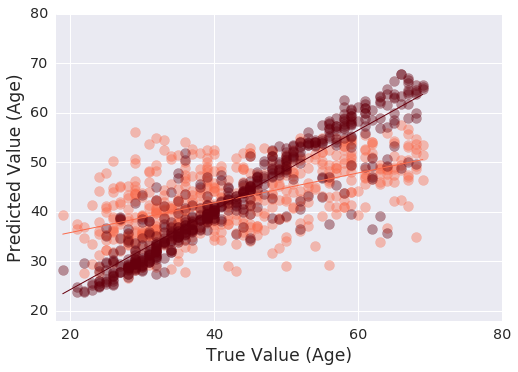

In [17]:
fig,ax = plt.subplots()
sample_list=PNP530
color_map='Reds'
prediction_dir=PRED_RESULTS_DIR+'Age/'
prediction_subdir_list=['XGB_randomSearch_25_byOldTCRfeatureMatrix/','XGB_randomSearch_25_byOldTCRfeatureMatrix_ageRegCorr/']
dataset_name_list = ['Old TCR feature Matrix','Old TCR feature Matrix - Age Corrected']

Y_file='%s/TCR_real_data/NewPhenotypicData/PNPage.xlsx' %MyPath
YName='Age'


ax,r_list,p_list,handles_list,labels_list=plot_many_corrs(ax,YName,Y_file,sample_list,color_map,prediction_subdir_list,prediction_dir,
                 dataset_name_list)
# print handles_list
# print labels_list

legend=zip(labels_list,r_list,p_list)
print legend

ax.legend(handles_list,dataset_name_list)
ax.set_xlim(18,80)
ax.set_ylim(18,80)

plt.show()

### plot everything together

527
527
527
527
[([u'True Value (Age)-Predicted Value (Age)'], 0.5606617830549926, 5.881189615526071e-45), ([u'True Value (Age)-Predicted Value (Age)', u'True Value (Age)-Predicted Value (Age)'], 0.924049888294857, 2.0956220697929567e-221)]


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc7abd77a90>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc7abd77a90>, <matplotlib.lines.Line2D object at 0x7fc7abd77910>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


527
527
527
527
[([u'True Value (Age)-Predicted Value (Age)'], 0.5777895676247623, 2.934203735986773e-48), ([u'True Value (Age)-Predicted Value (Age)', u'True Value (Age)-Predicted Value (Age)'], 0.3199261831504477, 5.2468638236593113e-14)]


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc7b27609d0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc7b27609d0>, <matplotlib.lines.Line2D object at 0x7fc7b2760650>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


527
527
527
527
[([u'True Value (Age)-Predicted Value (Age)'], 0.6368869785252494, 2.67471598798362e-61), ([u'True Value (Age)-Predicted Value (Age)', u'True Value (Age)-Predicted Value (Age)'], 0.9508190135392122, 2.1988714028015057e-269)]


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc7f4b47410>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc7f4b47410>, <matplotlib.lines.Line2D object at 0x7fc7f4b47b90>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


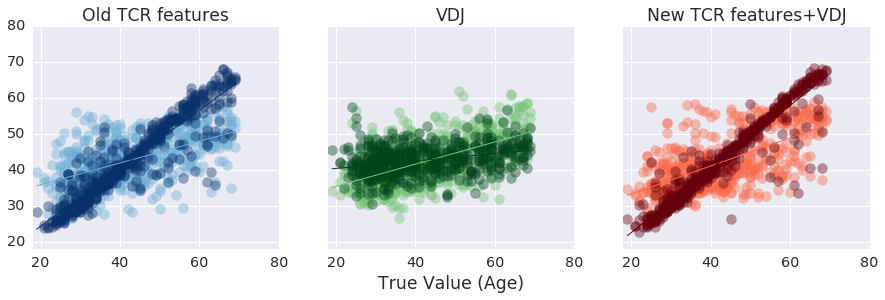

In [18]:
top_prediction_subdir_list=['XGB_randomSearch_25_byOldTCRfeatureMatrix/','XGB_randomSearch_25_byOldTCRfeatureMatrix_ageRegCorr/',
                            'XGB_randomSearch_25_byOldVDJ/','XGB_randomSearch_25_byOldVDJ_ageRegCorr/',
                            'XGB_randomSearch_25_byNewTCRfeatureMatrix/',
                            'XGB_randomSearch_25_byNewTCRfeatureMatrix_ageRegCorr/']
top_dataset_name_list=['Old TCR features','Old TCR features - Age Corrected',
                       'VDJ','VDJ - Age Corrected',
                       'New TCR features+VDJ','New TCR features+VDJ - Age Corrected']
color_map_list=['Blues','Greens','Reds']
sample_list=PNP530
Y_file='%s/TCR_real_data/NewPhenotypicData/PNPage.xlsx' %MyPath
YName='Age'


fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,4),sharey=True)
for n in range(3):
    
    ax=axes[n]
    
    color_map=color_map_list[n]
    prediction_dir=PRED_RESULTS_DIR+'Age/'
    prediction_subdir_list=[top_prediction_subdir_list[n*2],top_prediction_subdir_list[n*2+1]]
    dataset_name_list =[top_dataset_name_list[n*2],top_dataset_name_list[n*2+1]]

    ax,r_list,p_list,handles_list,labels_list=plot_many_corrs(ax,YName,Y_file,sample_list,color_map,prediction_subdir_list,prediction_dir,
                     dataset_name_list)
    ax.set_ylabel('')
    if n!=1: ax.set_xlabel('')
    ax.set_title(top_dataset_name_list[n*2],fontsize='x-large')
    # print handles_list
    # print labels_list

    legend=zip(labels_list,r_list,p_list)
    print legend

    ax.legend(handles_list,dataset_name_list)
    ax.set_xlim(18,80)
    ax.set_ylim(18,80)

plt.show()

# get shap values

In [52]:
dir1=PRED_RESULTS_DIR+'Age/'
dir_list=['XGB_randomSearch_25_byOldTCRfeatureMatrix/','XGB_randomSearch_25_byOldTCRfeatureMatrix_ageRegCorr/',
          'XGB_randomSearch_25_byOldTCRfeatureMatrix_ageGenderRegCorr/',
          'XGB_randomSearch_25_byOldVDJ/','XGB_randomSearch_25_byOldVDJ_ageRegCorr/',
          'XGB_randomSearch_25_byOldVDJ_ageGenderRegCorr/',
          'XGB_randomSearch_25_byNewTCRfeatureMatrix/','XGB_randomSearch_25_byNewTCRfeatureMatrix_ageRegCorr/',
         ]

for d in dir_list:
    print ''
    print '******** %s *********' %d
    
    shapDF=pd.read_pickle(dir1+d+'shap_values.pkl')['Age']
    
    print shapDF.abs().sum().sort_values(ascending=False).head(20)
    


******** XGB_randomSearch_25_byOldTCRfeatureMatrix/ *********
PC2                         2073.201032
cdr3Length_std_1             350.950012
top1000clonal_aa_1           328.368552
normSeqNums_per2000_NT_1     314.511125
PC1                          306.791520
d3Deletion_mean_1            274.099320
n2Insertion_std_1            273.461537
top1000clonal_nt_1           210.878531
d3Deletion_std_0             210.487683
d3Deletion_std_1             189.749246
totalAnnotatefreqs           188.316154
shannon_aa_1                 135.015092
vDeletion_std_1               95.999376
top10clonal_aa_1              91.534551
top10clonal_nt_1              88.011905
SIV_rel_seq_count             87.176871
PC5                           86.088274
frequencyCount (%)_std_0      65.130802
vDeletion_std_0               54.020806
simpson_aa_1                  53.697490
dtype: float64

******** XGB_randomSearch_25_byOldTCRfeatureMatrix_ageRegCorr/ *********
SIV_rel_cum_freq(perc)_AgeCorrRes       2299.240

# explore correlations of top age-prediction shap features with age before and after correction

## explore columns:

In [20]:
X=pd.read_pickle(FEATURES_DIR+'allTCRfeatures_percShared10__withRels_noT.dat')
X_ageCorr=pd.read_pickle(FEATURES_DIR+'allTCRfeatures_percShared10__withRels_noT_AgeCorr01.dat')

In [21]:
X_ageCorr.columns.tolist()

['cdr3Length_mean_0',
 'cdr3Length_mean_1',
 'count (templates)_max_0',
 'count (templates)_std_0',
 'd3Deletion_mean_0',
 'd3Deletion_std_0',
 'd5Deletion_mean_0',
 'd5Deletion_mean_1',
 'd5Deletion_std_0',
 'gc_content_1',
 'jDeletion_max_0',
 'jDeletion_max_1',
 'jDeletion_mean_0',
 'jDeletion_std_0',
 'jDeletion_std_1',
 'max_nt_per_aa_0',
 'mean_nt_per_aa_0',
 'mean_nt_per_aa_1',
 'n1Insertion_max_0',
 'n1Insertion_max_1',
 'n1Insertion_mean_0',
 'n1Insertion_mean_1',
 'n1Insertion_std_0',
 'n2Insertion_max_0',
 'n2Insertion_max_1',
 'n2Insertion_mean_0',
 'n2Insertion_mean_1',
 'n2Insertion_std_0',
 'n2Insertion_std_1',
 'simpson_aa_0',
 'simpson_nt_0',
 'vDeletion_max_0',
 'vDeletion_mean_0',
 'vDeletion_std_1',
 u'Allergy_rel_cum_freq(perc)',
 u'Allergy_rel_seq_count',
 u'BreastCancer_rel_cum_freq(perc)',
 u'BreastCancer_rel_seq_count',
 u'CMV_rel_cum_freq(perc)',
 u'CMV_rel_seq_count',
 u'CalcifiedAorticStenosisdisease_rel_cum_freq(perc)',
 u'CalcifiedAorticStenosisdisease_rel_seq_count',
 u'Carcinoma_rel_cum_freq(perc)',
 u'Carcinoma_rel_seq_count',
 u'Celiacdisease_rel_cum_freq(perc)',
 u'Celiacdisease_rel_seq_count',
 u'Colorectalcancer_rel_cum_freq(perc)',
 u'Colorectalcancer_rel_seq_count',
 u'DiabetesType1_rel_cum_freq(perc)',
 u'DiabetesType1_rel_seq_count',
 u'EBV_rel_cum_freq(perc)',
 u'EBV_rel_seq_count',
 u'GraftVsHostDisease_rel_cum_freq(perc)',
 u'HCV_rel_cum_freq(perc)',
 u'HCV_rel_seq_count',
 u'HIV_rel_cum_freq(perc)',
 u'HIV_rel_seq_count',
 u'HSV_rel_cum_freq(perc)',
 u'HTLV_rel_seq_count',
 u'HomoSapiens_rel_cum_freq(perc)',
 u'HomoSapiens_rel_seq_count',
 u'Influenza_rel_cum_freq(perc)',
 u'Influenza_rel_seq_count',
 u'LCMV_rel_cum_freq(perc)',
 u'LCMV_rel_seq_count',
 u'Leukemia_rel_cum_freq(perc)',
 u'Lungcancer_rel_cum_freq(perc)',
 u'Lupus_rel_cum_freq(perc)',
 u'M.tuberculosis_rel_cum_freq(perc)',
 u'M.tuberculosis_rel_seq_count',
 u'Melanoma_rel_cum_freq(perc)',
 u'Melanoma_rel_seq_count',
 u'Multiplesclerosis_rel_cum_freq(perc)',
 u'Multiplesclerosis_rel_seq_count',
 u'Plasmodiumberghei_rel_cum_freq(perc)',
 u'RSV_rel_cum_freq(perc)',
 u'RheumatoidArthritis_rel_cum_freq(perc)',
 u'RheumatoidArthritis_rel_seq_count',
 u'SIV_rel_seq_count',
 u'WestNilevirus_rel_cum_freq(perc)',
 u'WestNilevirus_rel_seq_count',
 u'YellowFeverVirus_rel_cum_freq(perc)',
 u'YellowFeverVirus_rel_seq_count',
 u'totalAnnotatefreqs',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 u'AA count_0_AgeCorrRes',
 u'AA count_1_AgeCorrRes',
 u'NT count_0_AgeCorrRes',
 u'NT count_1_AgeCorrRes',
 u'berger_aa_0_AgeCorrRes',
 u'berger_aa_1_AgeCorrRes',
 u'berger_nt_0_AgeCorrRes',
 u'berger_nt_1_AgeCorrRes',
 u'cdr3Length_max_0_AgeCorrRes',
 u'cdr3Length_max_1_AgeCorrRes',
 u'cdr3Length_std_0_AgeCorrRes',
 u'cdr3Length_std_1_AgeCorrRes',
 u'count (templates)_max_1_AgeCorrRes',
 u'count (templates)_mean_0_AgeCorrRes',
 u'count (templates)_mean_1_AgeCorrRes',
 u'count (templates)_std_1_AgeCorrRes',
 u'd3Deletion_mean_1_AgeCorrRes',
 u'd3Deletion_std_1_AgeCorrRes',
 u'd5Deletion_std_1_AgeCorrRes',
 u'frequencyCount (%)_max_0_AgeCorrRes',
 u'frequencyCount (%)_max_1_AgeCorrRes',
 u'frequencyCount (%)_mean_0_AgeCorrRes',
 u'frequencyCount (%)_mean_1_AgeCorrRes',
 u'frequencyCount (%)_std_0_AgeCorrRes',
 u'frequencyCount (%)_std_1_AgeCorrRes',
 u'gc_content_0_AgeCorrRes',
 u'jDeletion_mean_1_AgeCorrRes',
 u'max_nt_per_aa_1_AgeCorrRes',
 u'n1Insertion_std_1_AgeCorrRes',
 u'normSeqNums_per2000_NT_0_AgeCorrRes',
 u'normSeqNums_per2000_NT_1_AgeCorrRes',
 u'normSeqNums_per200_AA_0_AgeCorrRes',
 u'normSeqNums_per200_AA_1_AgeCorrRes',
 u'shannon_aa_0_AgeCorrRes',
 u'shannon_aa_1_AgeCorrRes',
 u'shannon_nt_0_AgeCorrRes',
 u'shannon_nt_1_AgeCorrRes',
 u'simpson_aa_1_AgeCorrRes',
 u'simpson_nt_1_AgeCorrRes',
 u'top1000clonal_aa_1_AgeCorrRes',
 u'top1000clonal_nt_0_AgeCorrRes',
 u'top1000clonal_nt_1_AgeCorrRes',
 u'top10clonal_aa_0_AgeCorrRes',
 u'top10clonal_aa_1_AgeCorrRes',
 u'top10clonal_nt_0_AgeCorrRes',
 u'top10clonal_nt_1_AgeCorrR

## explore features that contribute significantly to age prediction after correction - in OLD TCR feature prediction

plotting correlations between age, features, residuals, and residual variance

('r,p: ', -0.000351493899705886, 0.9935771759974629)
       simpson_aa_1  simpson_aa_1_AgeCorrRes  Age
BD406      0.999650                 0.006212   65
BD228      0.999869                 0.002531   32
BD714      0.997163                 0.000652   39
BD808      0.999434                 0.001386   26
BD144      0.998781                 0.001916   36
('r,p: ', -0.0004406244547667608, 0.9919485490101245)
       SIV_rel_cum_freq(perc)  SIV_rel_cum_freq(perc)_AgeCorrRes  Age
BD406                0.693304                           0.362048   65
BD228                0.361175                           0.133777   32
BD714                0.000000                          -0.249428   39
BD808                0.490287                           0.281773   26
BD144                0.295135                           0.055149   36
('r,p: ', -0.0006235229341723284, 0.9886066714571231)
       normSeqNums_per200_AA_0  normSeqNums_per200_AA_0_AgeCorrRes  Age
BD406                    182.3                 

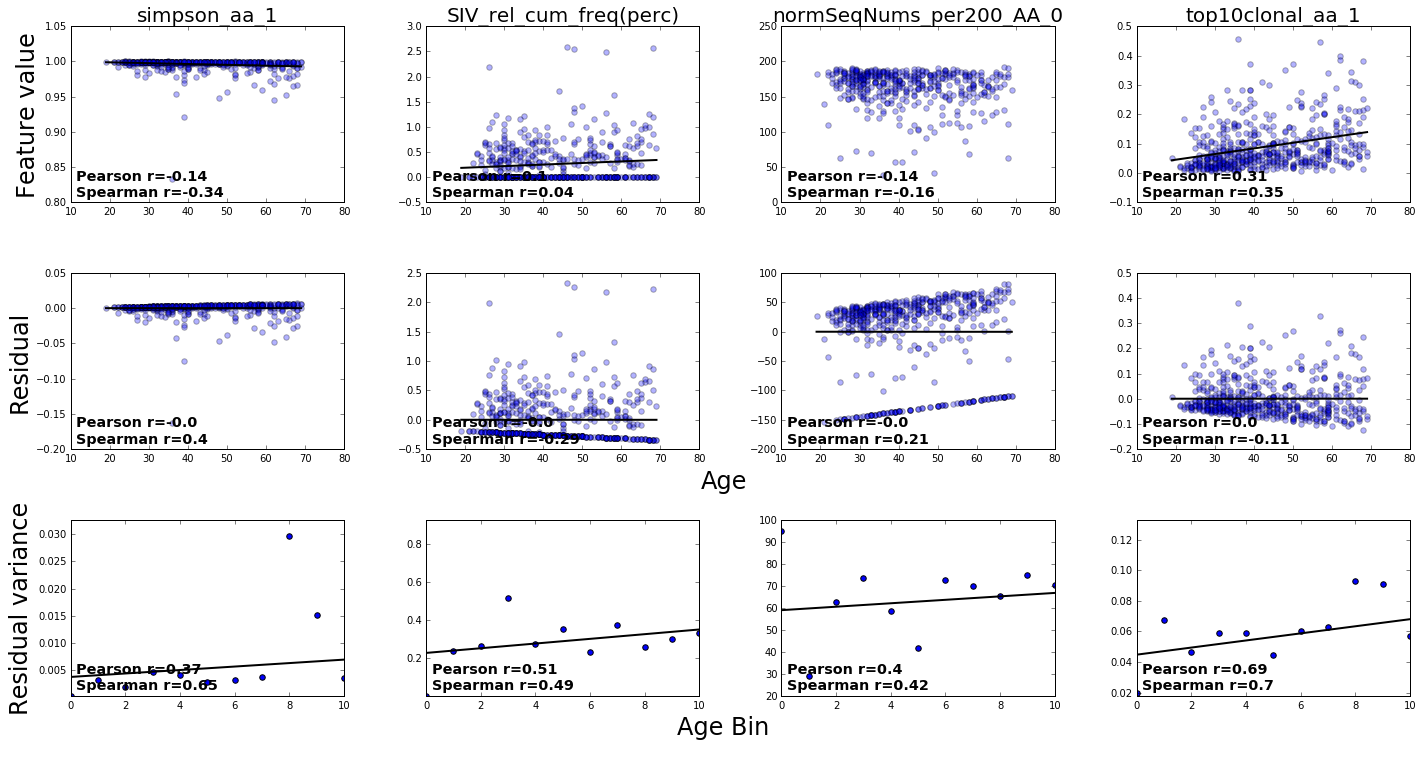

In [227]:
feature_list=['simpson_aa_1','SIV_rel_cum_freq(perc)','normSeqNums_per200_AA_0',
              'top10clonal_aa_1']   
suffix='_AgeCorrRes'
X=pd.read_pickle(FEATURES_DIR+'X_withPredictedAgeGender.dat')
X_ageCorr=pd.read_pickle(FEATURES_DIR+'X_withPredictedAgeGender_AgeCorrRes.dat')
Age=pd.read_excel('%s/TCR_real_data/NewPhenotypicData/PNPage.xlsx' %MyPath).set_index('BD')['Age']

fig,axes=plt.subplots(nrows=3,ncols=len(feature_list),figsize=(6*len(feature_list),12),sharex=False)

for n,feature in enumerate(feature_list):
    merged=pd.merge(pd.DataFrame(X[feature]),pd.DataFrame(X_ageCorr[feature+suffix]),
                    how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,pd.DataFrame(Age),how='inner',left_index=True,right_index=True)
    
    ##calculate correlations between resoduals and age:
    r,p=MyPearsonr(merged[feature+'_AgeCorrRes'],merged['Age'])
    print ('r,p: ',r,p)
    
    print merged.head()
    try:
        ax1=axes[0,n]
    except:
        ax1=axes[0]
    data1=merged['Age']
    data2=merged[feature]
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax1.scatter(data1,data2,alpha=0.3,s=30)
    ax1.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
    ax1.set_title(feature,fontsize=20)
    ax1.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax1.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    if n ==0:
        ax1.set_ylabel('Feature value',fontsize=24)
        
        
    try:
        ax2=axes[1,n]
    except:
        ax2=axes[1]
    data1=merged['Age']
    data2=merged[feature+'_AgeCorrRes']
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax2.scatter(data1,data2,alpha=0.3,s=30)
    ax2.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
#     ax2.set_title(feature)
    ax2.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax2.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    if n ==0:
        ax2.set_ylabel('Residual',fontsize=24)
    
    
    merged['age bin']=pd.cut(merged['Age'], 25,labels=range(25))
#     merged['age bin']=pd.cut(merged['Age'], 25)
#     print merged.head(10)
    merged_grouped=merged[[feature+'_AgeCorrRes','age bin']].groupby('age bin').std()
    
#     print merged_grouped
#     r,p=MyPearsonr(merged_grouped[feature+'_AgeCorrRes'],merged_grouped.index)
    
    
    ###plot correlation between age bin and residual varaince:
    
    try:
        ax3=axes[2,n]
    except:
        ax3=axes[2]
    data1=merged_grouped.index
    data2=merged_grouped[feature+'_AgeCorrRes']
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax3.scatter(data1,data2,alpha=1,s=30)
    ax3.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
#     ax3.set_title(feature)
    ax3.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax3.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    ax3.set_xlim(0,10)
    
    if n ==0:
        ax3.set_ylabel('Residual variance',fontsize=24)
        
    ymin=np.min(data2) * 0.9
    ymax=np.max(data2) * 1.1
    
    adj_ymin=adjusted_rounddown(ymin)
    adj_ymax=adjusted_rounddown(ymax)
    ax3.set_ylim(adj_ymin,adj_ymax)
    
plt.text(2,1.1,'Age',fontsize=24,transform=ax.transAxes,ha='center',va='bottom')
plt.text(2,0,'Age Bin',fontsize=24,transform=ax.transAxes,ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3,hspace=0.4)


fig.savefig(FIGURE_DIR+'age_highShapFeatures.png')
plt.show()
    

In [107]:
def adjusted_roundup(num,use1LevelBelow=False):
    if (num>1) or (num<-1):
        s_num=str(num)
        fraction=s_num.split('.')[0]
        fold=len(fraction.replace('-',''))
        if use1LevelBelow:
            fold=fold-1
        roundup_fold=10**(fold-1)
    else:
        s_num=str(num)
        fraction=s_num.split('.')[1]
        fold=len(fraction.replace('-',''))
        roundup_fold=10**-(fold-1)
        
    return int(math.ceil(float(num) / roundup_fold)) * roundup_fold

def adjusted_rounddown(num,use1LevelBelow=False):
    if (num>1) or (num<-1):
        s_num=str(num)
        fraction=s_num.split('.')[0]
        fold=len(fraction.replace('-',''))
        if use1LevelBelow:
            fold=fold-1
        roundup_fold=10**(fold-1)
    else:
        s_num=str(num)
        fraction=s_num.split('.')[1]
        fold=len(fraction.replace('-',''))
        roundup_fold=10**-(fold-1)
        
    return int(math.floor(float(num) / roundup_fold)) * roundup_fold

In [98]:
adjusted_roundup(354,use1LevelBelow=True)

360

In [99]:
adjusted_rounddown(354,use1LevelBelow=True)

350

## explore features that don't contribute significantly to age prediction after correction

('r,p: ', -0.00030587680911257914, 0.9944107193648998)
       max_nt_per_aa_1  max_nt_per_aa_1_AgeCorrRes  Age
BD406              8.0                   -8.398860   65
BD228              4.0                   -8.486996   32
BD714             21.0                    7.683215   39
BD808             14.0                    2.224252   26
BD144             17.0                    4.038839   36
('r,p: ', -0.0007281329877734601, 0.9866953472691111)
       totalAnnotateSeqs  totalAnnotateSeqs_AgeCorrRes  Age
BD406                118                    -21.699640   65
BD228                208                     19.617709   32
BD714                116                    -62.055668   39
BD808                254                     56.766318   26
BD144                257                     74.518637   36
('r,p: ', -0.0008558320488787728, 0.9843622694624882)
            PC1  PC1_AgeCorrRes  Age
BD406  0.021027       -0.009972   65
BD228  0.038928       -0.003219   32
BD714  0.035906       -0.00387

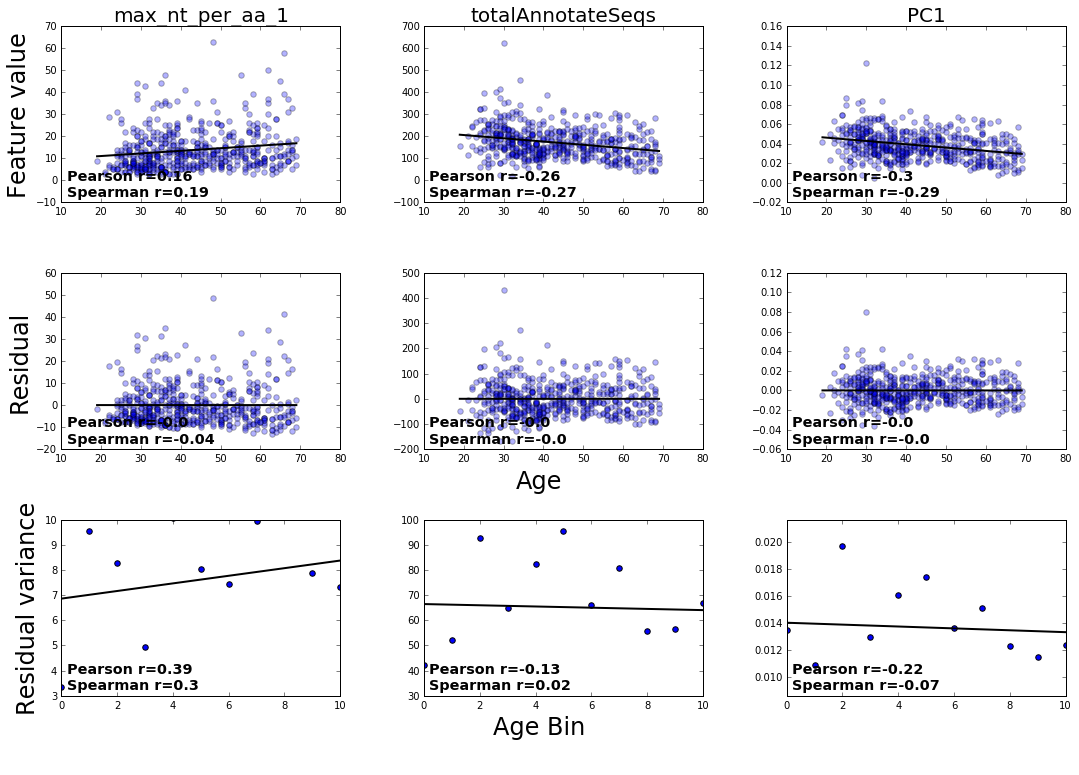

In [228]:
feature_list=['max_nt_per_aa_1',
              'totalAnnotateSeqs','PC1']   
suffix='_AgeCorrRes'
X=pd.read_pickle(FEATURES_DIR+'X_withPredictedAgeGender.dat')
X_ageCorr=pd.read_pickle(FEATURES_DIR+'X_withPredictedAgeGender_AgeCorrRes.dat')
Age=pd.read_excel('%s/TCR_real_data/NewPhenotypicData/PNPage.xlsx' %MyPath).set_index('BD')['Age']

fig,axes=plt.subplots(nrows=3,ncols=len(feature_list),figsize=(6*len(feature_list),12),sharex=False)

for n,feature in enumerate(feature_list):
    merged=pd.merge(pd.DataFrame(X[feature]),pd.DataFrame(X_ageCorr[feature+suffix]),
                    how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,pd.DataFrame(Age),how='inner',left_index=True,right_index=True)
    
    ##calculate correlations between resoduals and age:
    r,p=MyPearsonr(merged[feature+'_AgeCorrRes'],merged['Age'])
    print ('r,p: ',r,p)
    
    print merged.head()
    try:
        ax1=axes[0,n]
    except:
        ax1=axes[0]
    data1=merged['Age']
    data2=merged[feature]
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax1.scatter(data1,data2,alpha=0.3,s=30)
    ax1.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
    ax1.set_title(feature,fontsize=20)
    ax1.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax1.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    if n ==0:
        ax1.set_ylabel('Feature value',fontsize=24)
        
        
    try:
        ax2=axes[1,n]
    except:
        ax2=axes[1]
    data1=merged['Age']
    data2=merged[feature+'_AgeCorrRes']
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax2.scatter(data1,data2,alpha=0.3,s=30)
    ax2.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
#     ax2.set_title(feature)
    ax2.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax2.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    if n ==0:
        ax2.set_ylabel('Residual',fontsize=24)
    
    
    merged['age bin']=pd.cut(merged['Age'], 25,labels=range(25))
    merged_grouped=merged[[feature+'_AgeCorrRes','age bin']].groupby('age bin').std()
    
#     print merged_grouped
#     r,p=MyPearsonr(merged_grouped[feature+'_AgeCorrRes'],merged_grouped.index)
    
    
    ###plot correlation between age bin and residual varaince:
    
    try:
        ax3=axes[2,n]
    except:
        ax3=axes[2]
    data1=merged_grouped.index
    data2=merged_grouped[feature+'_AgeCorrRes']
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax3.scatter(data1,data2,alpha=1,s=30)
    ax3.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
#     ax3.set_title(feature)
    ax3.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax3.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    ax3.set_xlim(0,10)
    
    if n ==0:
        ax3.set_ylabel('Residual variance',fontsize=24)
        
    ymin=np.min(data2) * 0.9
    ymax=np.max(data2) * 1.1
    
    adj_ymin=adjusted_rounddown(ymin)
    adj_ymax=adjusted_rounddown(ymax)
    ax3.set_ylim(adj_ymin,adj_ymax)
    
plt.text(1.45,1.1,'Age',fontsize=24,transform=ax.transAxes,ha='center',va='bottom')
plt.text(1.45,0,'Age Bin',fontsize=24,transform=ax.transAxes,ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3,hspace=0.4)


fig.savefig(FIGURE_DIR+'age_lowShapFeatures.png')
plt.show()
    

## old-plot the same but without indicating spearman correlations

       max_nt_per_aa_1  max_nt_per_aa_1_AgeCorrRes  Age
BD406              8.0                   -8.397546   65
BD228              4.0                   -8.488617   32
BD714             21.0                    7.682216   39
BD808             14.0                    2.222097   26
BD144             17.0                    4.037573   36
       totalAnnotateSeqs  totalAnnotateSeqs_AgeCorrRes  Age
BD406                118                    -21.651816   65
BD228                208                     19.607149   32
BD714                116                    -62.053844   39
BD808                254                     56.745143   26
BD144                257                     74.515153   36
            PC1  PC1_AgeCorrRes  Age
BD406  0.021027       -0.009961   65
BD228  0.038928       -0.003222   32
BD714  0.035906       -0.003876   39
BD808  0.053461        0.009281   26
BD144  0.055131        0.014334   36


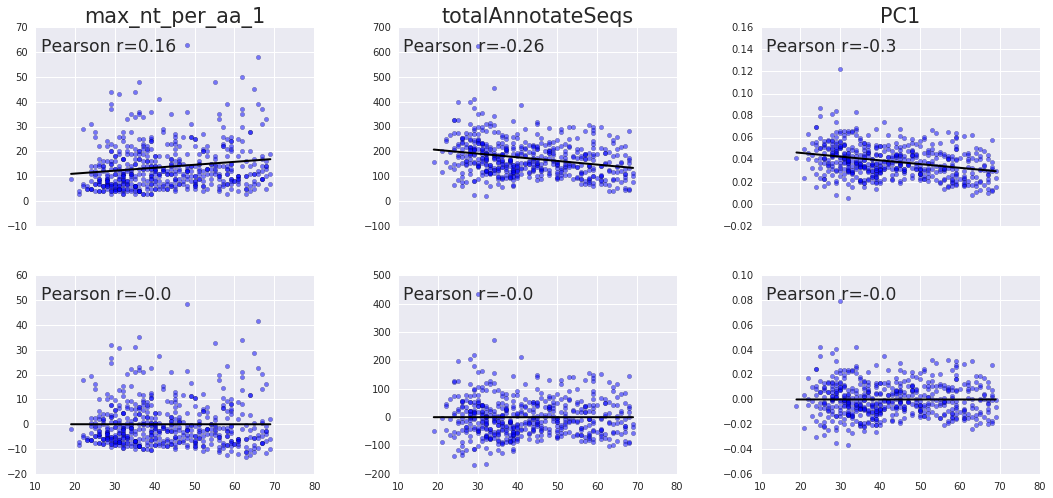

In [24]:
feature_list=['max_nt_per_aa_1',
              'totalAnnotateSeqs','PC1']   
suffix='_AgeCorrRes'
X=pd.read_pickle(FEATURES_DIR+'allTCRfeatures_percShared10__withRels_noT.dat')
X_ageCorr=pd.read_pickle(FEATURES_DIR+'allTCRfeatures_percShared10__withRels_noT_AgeCorr01.dat')
Age=pd.read_excel('%s/TCR_real_data/NewPhenotypicData/PNPage.xlsx' %MyPath).set_index('BD')['Age']

fig,axes=plt.subplots(nrows=2,ncols=len(feature_list),figsize=(6*len(feature_list),8),sharex=True)

for n,feature in enumerate(feature_list):
    merged=pd.merge(pd.DataFrame(X[feature]),pd.DataFrame(X_ageCorr[feature+suffix]),
                    how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,pd.DataFrame(Age),how='inner',left_index=True,right_index=True)
    
    print merged.head()
    try:
        ax1=axes[0,n]
    except:
        ax1=axes[0]
    data1=merged['Age']
    data2=merged[feature]
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax1.scatter(data1,data2,alpha=0.5,s=20)
    ax1.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
    ax1.set_title(feature,fontsize='xx-large')
    ax1.text(0.02,0.95,'Pearson r=%s' %round(r_pear,2),transform=ax1.transAxes,ha='left',va='top',fontsize='x-large')
    
    try:
        ax2=axes[1,n]
    except:
        ax2=axes[1]
    data1=merged['Age']
    data2=merged[feature+suffix]
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax2.scatter(data1,data2,alpha=0.5,s=20)
    ax2.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    ax2.text(0.02,0.95,'Pearson r=%s' %round(r_pear,2),transform=ax2.transAxes,ha='left',va='top',fontsize='x-large')

plt.subplots_adjust(wspace=0.3,hspace=0.25)
plt.show()
    
    

#     data1name=feature
#     data2name=feature+' (Age corrected)'
    
#     ax, nsamples,r,p,text, handles, labels=plot_corr(data1,data2,data1name,data2name,ax,title=None,corrType='pearson',
#               toAnnotate=True,plotTrendLine=True,scatter_kws={'alpha':0.4,'s':100},
#                text_kws={'fontsize':'x-large'},linecolor='black')
    
    
#     data2=X_ageCorr[feature]

## calculate correlation between shap value and age_bin-residual variance correlation:
I suspect that the more contributing a feature is, the stronger the correlation is

In [53]:
shap_values=shapDF.abs().sum().sort_values(ascending=False)
shap_values.head()

simpson_aa_1_AgeCorrRes                              1350.533070
SIV_rel_cum_freq(perc)_AgeCorrRes                     812.961651
CalcifiedAorticStenosisdisease_rel_cum_freq(perc)     590.405723
simpson_nt_0                                          244.226220
normSeqNums_per200_AA_0_AgeCorrRes                    100.934023
dtype: float64

In [133]:
df=pd.DataFrame(shap_values.rename('shap_value'))

for n,corr_feature in enumerate(shap_values.index):
#     print n,corr_feature
    
    try:
        if 'Corr' in corr_feature:
            suffix=corr_feature.split('_')[-1]
            feature=corr_feature.replace('_'+suffix,'')
        else:
            feature=corr_feature

        merged=pd.merge(pd.DataFrame(X[feature]),pd.DataFrame(X_ageCorr[corr_feature]),
                        how='inner',left_index=True,right_index=True)
        merged=pd.merge(merged,pd.DataFrame(Age),how='inner',left_index=True,right_index=True)

        merged['age bin']=pd.cut(merged['Age'], 25,labels=range(25))
        merged_grouped=merged[[corr_feature,'age bin']].groupby('age bin').std()

        data1=merged_grouped.index
        data2=merged_grouped[corr_feature]

        r_pear,p_pear=MyPearsonr(data1,data2)

        df.loc[corr_feature,'ageBin_resVar_corr']=r_pear
    except:
#         print 'this feature was not corrected'
        pass

r,p=MyPearsonr(df['shap_value'],df['ageBin_resVar_corr'])

df=df[df['ageBin_resVar_corr'].notnull()]
print df.head(10).ageBin_resVar_corr.mean()

print df.tail(10).ageBin_resVar_corr.mean()

df['shap bin']=pd.qcut(df['shap_value'], 5,labels=range(5))

# print df['shap bin']
df_grouped=df[['ageBin_resVar_corr','shap bin']].groupby('shap bin').mean()
print df_grouped
# r,p=MyPearsonr(df['shap_value'],df['ageBin_resVar_corr'])

print r,p
# df.head(10)

df_grouped



0.5126846234222641
0.21541266555428282
          ageBin_resVar_corr
shap bin                    
0                   0.154571
1                   0.108957
2                   0.110504
3                   0.175955
4                   0.324995
0.147655968790432 0.17487094825523308


,ageBin_resVar_corr
shap bin,
0,0.154571
1,0.108957
2,0.110504
3,0.175955
4,0.324995


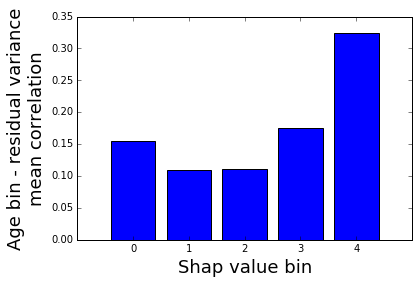

In [191]:
fig,ax=plt.subplots()

ax.bar(df_grouped.index.tolist(),df_grouped['ageBin_resVar_corr'].tolist(),align='center')

ax.set_ylabel('Age bin - residual variance\nmean correlation',fontsize=18)
ax.set_xlabel('Shap value bin',fontsize=18)
ax.set_xticks(range(5))
ax.set_xticklabels(range(5),horizontalalignment='center')
fig.savefig(FIGURE_DIR+'residual variance in different shap-ranked features.png')


plt.show()

# check the same things with Gender:

## get shap values

In [222]:
dir1=PRED_RESULTS_DIR+'Age/'
dir_list=['Gender_XGB_randomSearch_25_byOldTCRfeatureMatrix/',
          'Gender_XGB_randomSearch_25_byOldTCRfeatureMatrix_genderCorrected/',
         ]

for d in dir_list:
    print ''
    print '******** %s *********' %d
    
    shapDF=pd.read_pickle(dir1+d+'shap_values.pkl')['Gender_Male']
    
    print shapDF.abs().sum().sort_values(ascending=False).head(20)
    print shapDF.abs().sum().sort_values(ascending=False).tail(20)
    


******** Gender_XGB_randomSearch_25_byOldTCRfeatureMatrix/ *********
Melanoma_rel_cum_freq(perc)       41.775631
n1Insertion_mean_1                40.678280
PC8                               30.751679
PC4                               20.115074
cdr3Length_std_0                  18.831703
vDeletion_std_1                   13.532887
HomoSapiens_rel_cum_freq(perc)    10.111477
frequencyCount (%)_std_1          10.055551
n2Insertion_std_0                  9.795596
DENV_rel_seq_count                 9.620921
totalAnnotateSeqs                  8.478926
vDeletion_std_0                    8.108363
d5Deletion_std_0                   7.502086
LCMV_rel_seq_count                 7.119250
count (templates)_max_1            6.491350
top1000clonal_nt_1                 6.268317
HomoSapiens_rel_seq_count          6.218394
vDeletion_mean_1                   5.683051
n1Insertion_std_0                  4.879126
berger_aa_0                        4.723341
dtype: float64
top1000clonal_nt_1                 

## explore features that contribute significantly to gender prediction after correction - in OLD TCR feature prediction

plotting correlations between gender, features, residuals, and residual variance

     Gender
BD         
BD1  Female
BD2    Male
BD3  Female
BD4  Female
BD5    Male
0 simpson_nt_0
       simpson_nt_0  simpson_nt_0_Gender_MaleCorrRes  Gender_Male
BD406      0.999463                         0.005851          0.0
BD228      0.999578                         0.012830          1.0
BD714      0.986514                        -0.000234          1.0
BD808      0.999701                         0.006089          0.0
BD144      0.998440                         0.004829          0.0
('r,p: ', 0.000287313139645486, 0.9948204684181842)
       simpson_nt_0  simpson_nt_0_Gender_MaleCorrRes  Gender_Male
BD406      0.999463                         0.005851          0.0
BD228      0.999578                         0.012830          1.0
BD714      0.986514                        -0.000234          1.0
BD808      0.999701                         0.006089          0.0
BD144      0.998440                         0.004829          0.0
1 count (templates)_max_0
       count (templates)_max_0 

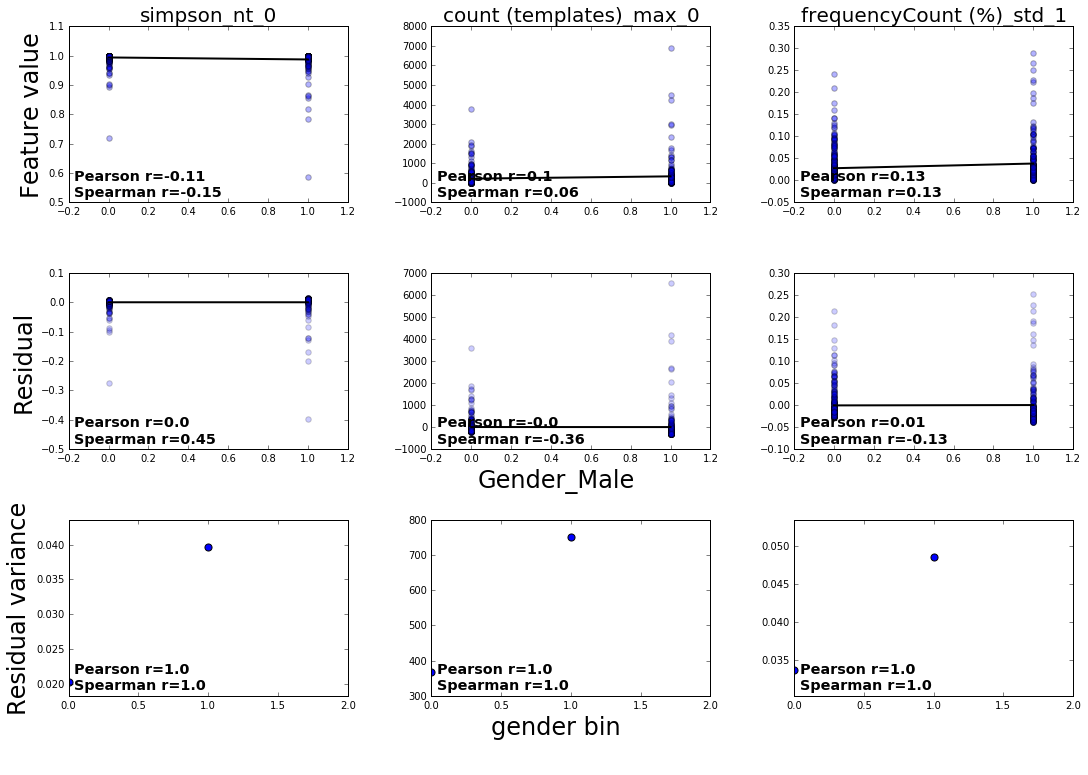

In [229]:
feature_list=['simpson_nt_0','count (templates)_max_0','frequencyCount (%)_std_1']
   
suffix='_Gender_MaleCorrRes'
X=pd.read_pickle(FEATURES_DIR+'allTCRfeatures_percShared10__withRels_noT.dat')
X_genderCorr=pd.DataFrame(pd.read_pickle(FEATURES_DIR+'allTCRfeatures_percShared10__withRels_noT_Gender_MaleCorr01.dat'))
Gender_Male=pd.DataFrame(pd.read_excel('%s/TCR_real_data/NewPhenotypicData/PNPgender.xlsx' %MyPath).set_index('BD')['Gender'])
print Gender_Male.head()
Gender_Male['Gender_Male']=np.where(Gender_Male['Gender']=='Male',1,np.where(Gender_Male['Gender']=='Female',0,np.nan))

fig,axes=plt.subplots(nrows=3,ncols=len(feature_list),figsize=(6*len(feature_list),12),sharex=False)

for n,feature in enumerate(feature_list):
    print n,feature
    merged=pd.merge(pd.DataFrame(X[feature]),pd.DataFrame(X_genderCorr[feature+suffix]),
                    how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,pd.DataFrame(Gender_Male['Gender_Male']),how='inner',left_index=True,right_index=True)
    print merged.head()
    
    ##calculate correlations between resoduals and Gender:
    r,p=MyPearsonr(merged[feature+suffix],merged['Gender_Male'])
    print ('r,p: ',r,p)
    
    print merged.head()
    try:
        ax1=axes[0,n]
    except:
        ax1=axes[0]
    data1=merged['Gender_Male']
    data2=merged[feature]
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax1.scatter(data1,data2,alpha=0.3,s=30)
    ax1.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
    ax1.set_title(feature,fontsize=20)
    ax1.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax1.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    if n ==0:
        ax1.set_ylabel('Feature value',fontsize=24)
        
        
    try:
        ax2=axes[1,n]
    except:
        ax2=axes[1]
    data1=merged['Gender_Male']
    data2=merged[feature+suffix]
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax2.scatter(data1,data2,alpha=0.2,s=30)
    ax2.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
#     ax2.set_title(feature)
    ax2.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax2.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    if n ==0:
        ax2.set_ylabel('Residual',fontsize=24)
    
    
    merged['gender bin']=pd.cut(merged['Gender_Male'], 2,labels=range(2))
#     merged['gender bin']=pd.cut(merged['Gender_Male'], 2)
#     print merged.head(10)
    merged_grouped=merged[[feature+suffix,'gender bin']].groupby('gender bin').std()
    
#     print merged_grouped
#     r,p=MyPearsonr(merged_grouped[feature+suffix],merged_grouped.index)
    
    
    ###plot correlation between age bin and residual varaince:
    
    try:
        ax3=axes[2,n]
    except:
        ax3=axes[2]
    data1=merged_grouped.index
    data2=merged_grouped[feature+suffix]
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax3.scatter(data1,data2,alpha=1,s=50)
#     ax3.boxplot()
#     ax3.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
#     ax3.set_title(feature)
    ax3.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax3.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    ax3.set_xlim(0,2)
    
    if n ==0:
        ax3.set_ylabel('Residual variance',fontsize=24)
        
    ymin=np.min(data2) * 0.9
    ymax=np.max(data2) * 1.1
    
    adj_ymin=adjusted_rounddown(ymin)
    adj_ymax=adjusted_rounddown(ymax)
    ax3.set_ylim(adj_ymin,adj_ymax)
    
plt.text(1.5,1.1,'Gender_Male',fontsize=24,transform=ax.transAxes,ha='center',va='bottom')
plt.text(1.5,0,'gender bin',fontsize=24,transform=ax.transAxes,ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3,hspace=0.4)


fig.savefig(FIGURE_DIR+'gender_highShapFeatures.png')
plt.show()
    

## explore features that dont contribute significantly to gender prediction after correction - in OLD TCR feature prediction

plotting correlations between gender, features, residuals, and residual variance

     Gender
BD         
BD1  Female
BD2    Male
BD3  Female
BD4  Female
BD5    Male
0 normSeqNums_per200_AA_1
       normSeqNums_per200_AA_1  normSeqNums_per200_AA_1_Gender_MaleCorrRes  Gender_Male
BD406                    197.0                                    9.118902          0.0
BD228                    198.7                                   15.168317          1.0
BD714                    177.0                                   -6.531683          1.0
BD808                    192.7                                    4.818902          0.0
BD144                    189.6                                    1.718902          0.0
('r,p: ', -0.01252989658756084, 0.7770888663425493)
       normSeqNums_per200_AA_1  normSeqNums_per200_AA_1_Gender_MaleCorrRes  Gender_Male
BD406                    197.0                                    9.118902          0.0
BD228                    198.7                                   15.168317          1.0
BD714                    177.0                

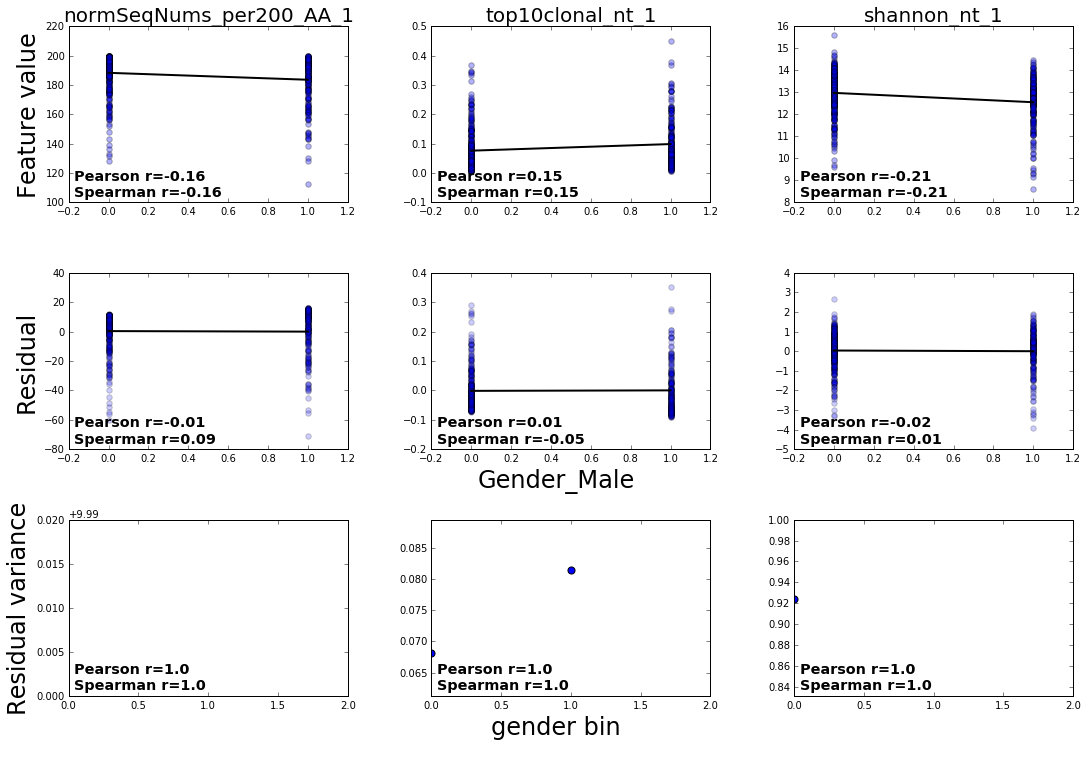

In [225]:
feature_list=['normSeqNums_per200_AA_1','top10clonal_nt_1','shannon_nt_1']
   
suffix='_Gender_MaleCorrRes'
X=pd.read_pickle(FEATURES_DIR+'allTCRfeatures_percShared10__withRels_noT.dat')
X_genderCorr=pd.DataFrame(pd.read_pickle(FEATURES_DIR+'allTCRfeatures_percShared10__withRels_noT_Gender_MaleCorr01.dat'))
Gender_Male=pd.DataFrame(pd.read_excel('%s/TCR_real_data/NewPhenotypicData/PNPgender.xlsx' %MyPath).set_index('BD')['Gender'])
print Gender_Male.head()
Gender_Male['Gender_Male']=np.where(Gender_Male['Gender']=='Male',1,np.where(Gender_Male['Gender']=='Female',0,np.nan))

fig,axes=plt.subplots(nrows=3,ncols=len(feature_list),figsize=(6*len(feature_list),12),sharex=False)

for n,feature in enumerate(feature_list):
    print n,feature
    merged=pd.merge(pd.DataFrame(X[feature]),pd.DataFrame(X_genderCorr[feature+suffix]),
                    how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,pd.DataFrame(Gender_Male['Gender_Male']),how='inner',left_index=True,right_index=True)
    print merged.head()
    
    ##calculate correlations between resoduals and Gender:
    r,p=MyPearsonr(merged[feature+suffix],merged['Gender_Male'])
    print ('r,p: ',r,p)
    
    print merged.head()
    try:
        ax1=axes[0,n]
    except:
        ax1=axes[0]
    data1=merged['Gender_Male']
    data2=merged[feature]
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax1.scatter(data1,data2,alpha=0.3,s=30)
    ax1.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
    ax1.set_title(feature,fontsize=20)
    ax1.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax1.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    if n ==0:
        ax1.set_ylabel('Feature value',fontsize=24)
        
        
    try:
        ax2=axes[1,n]
    except:
        ax2=axes[1]
    data1=merged['Gender_Male']
    data2=merged[feature+suffix]
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax2.scatter(data1,data2,alpha=0.2,s=30)
    ax2.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
#     ax2.set_title(feature)
    ax2.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax2.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    if n ==0:
        ax2.set_ylabel('Residual',fontsize=24)
    
    
    merged['gender bin']=pd.cut(merged['Gender_Male'], 2,labels=range(2))
#     merged['gender bin']=pd.cut(merged['Gender_Male'], 2)
#     print merged.head(10)
    merged_grouped=merged[[feature+suffix,'gender bin']].groupby('gender bin').std()
    
#     print merged_grouped
#     r,p=MyPearsonr(merged_grouped[feature+suffix],merged_grouped.index)
    
    
    ###plot correlation between age bin and residual varaince:
    
    try:
        ax3=axes[2,n]
    except:
        ax3=axes[2]
    data1=merged_grouped.index
    data2=merged_grouped[feature+suffix]
    
    r_pear,p_pear=MyPearsonr(data1,data2)
    r_spear,p_spear=MySpearmanr(data1,data2)
    
    ax3.scatter(data1,data2,alpha=1,s=50)
#     ax3.boxplot()
#     ax3.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c='black',linewidth=2)
    
#     ax3.set_title(feature)
    ax3.text(0.02,0.02,'Pearson r=%s\nSpearman r=%s' %(round(r_pear,2),round(r_spear,2)),transform=ax3.transAxes,
             ha='left',va='bottom',fontsize='x-large',fontweight='bold')
    
    ax3.set_xlim(0,2)
    
    if n ==0:
        ax3.set_ylabel('Residual variance',fontsize=24)
        
    ymin=np.min(data2) * 0.9
    ymax=np.max(data2) * 1.1
    
    adj_ymin=adjusted_rounddown(ymin)
    adj_ymax=adjusted_rounddown(ymax)
    ax3.set_ylim(adj_ymin,adj_ymax)
    
plt.text(1.5,1.1,'Gender_Male',fontsize=24,transform=ax.transAxes,ha='center',va='bottom')
plt.text(1.5,0,'gender bin',fontsize=24,transform=ax.transAxes,ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3,hspace=0.4)


fig.savefig(FIGURE_DIR+'gender_lowShapFeatures.png')
plt.show()
    

# Try to correct features using GLM and not OLS
SKLEARN'S linear regression is OLS, which is a specific case of GLM

In [ ]:
import statsmodels.api as sm

df=pd.DataFrame(np.random.randint(0,4,size=(1000,3)))
df[3]=df[0]*3+df[1]**2+df[2]
# df=df.rename(columns={0:'X',1:'noise',2:'y_true'})



gamma_model_gaus = sm.GLM(df.iloc[:,3], df.iloc[:,:3], family=sm.families.Gaussian())
gamma_model_gamma = sm.GLM(df.iloc[:,3], df.iloc[:,:3], family=sm.families.Gamma())
gamma_model_Binomial= sm.GLM(df.iloc[:,3], df.iloc[:,:3], family=sm.families.Binomial())
df['gamma_model_gaus']=gamma_model_gaus.fit().mu
df['gamma_model_gamma']=gamma_model_gamma.fit().mu
df['gamma_model_Binomial']=gamma_model_Binomial.fit().mu

lm=LinearRegression()
lm.fit(df.iloc[:,:3],df.iloc[:,3])
y_pred=pd.DataFrame(index=df.index.tolist(),data=lm.predict(df.iloc[:,:3]))
df['linReg']=y_pred


print df.head(10)

In [ ]:
r,p=MyPearsonr(df[3],df['gamma_model_gaus'])
print ('gamma_model_gaus',r,p)

r,p=MyPearsonr(df[3],df['gamma_model_gamma'])
print ('gamma_model_gamma',r,p)

r,p=MyPearsonr(df[3],df['linReg'])
print ('linReg',r,p)

In [ ]:
def calc_residuals_GLM(feature_data,phen_data,featureName,sampleSubset,toPlot=True):
    
    import statsmodels.api as sm
    
    
    lm=LinearRegression()
    lm.fit(phen_data.loc[sampleSubset,:],feature_data.loc[sampleSubset,:])
    y_pred=pd.DataFrame(index=phen_data.index.tolist(),data=lm.predict(phen_data))
    
    merged=pd.merge(feature_data,y_pred,how='inner',left_index=True, right_index=True)
    merged['res']=merged[featureName]-merged[0]
    print ('sum of residuals for the fitted data only:', merged.loc[sampleSubset,'res'].sum())
    
    ###plot:
    if toPlot:
        fig1,ax1=plt.subplots()
        ax1.scatter(phen_data.loc[sampleSubset,:],feature_data.loc[sampleSubset,:],c='blue',s=50)
        ax1.plot(phen_data.loc[sampleSubset,:],y_pred.loc[sampleSubset,:],c='black',lw=3)
        ax1.set_title('Linear regression - '+featureName)
        plt.show()
        
        fig2,ax2=plt.subplots()
        ax2.hist(feature_data.loc[sampleSubset,featureName],color='grey',bins=25)
        ax2.set_title('Value distribution - '+featureName)
        plt.show()
        
        fig3,ax3=plt.subplots()
        ax3.hist(merged['res'], color='grey',bins=25)
        ax3.set_title('Residual Value distribution - '+featureName)
        plt.show()
    
#     print merged.head(10)
    print merged[featureName].median()
    return merged['res']

In [ ]:
#PNP530 and Cardio126 samples:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126


#load original X:
f1='%s/TCR_real_data/Predictions/featureDFs/X_withPredictedAgeGender.dat' %MyPath
allFeatures=pd.read_pickle(f1).loc[PNP530Cardio126,:]
print ('original X shape is:', allFeatures.shape)
print allFeatures.iloc[:4,:4]

#load phenotypeDF:
f2=PRED_RESULTS_DIR+'TargetDFs/PNP530Cardio126_AgeGender.xlsx'
phenotypeDF=pd.read_excel(f2).set_index('BD').loc[PNP530Cardio126,:]
print ('phenotype DF shape is:', phenotypeDF.shape)
print phenotypeDF.iloc[:4,:4]

#check which features need correction for age:
print 'checking which features need correction for age:'
X=allFeatures
phen='Age'
sampleSubset=PNP530

featToCorrect=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset)


#correct all featues for age and generate new X:
X_ageCorr=pd.DataFrame(index=X.index, columns=X.columns,data=np.nan)
X_ageCorr=X_ageCorr.loc[PNP530Cardio126,:] #ensure sample order
for n,feature in enumerate(X_ageCorr.columns):
    print n,feature
    if feature in featToCorrect:
        
        phen_data=pd.DataFrame(phenotypeDF['Age'].fillna(phenotypeDF['Age'].median())).loc[PNP530Cardio126,:]
        feature_data=pd.DataFrame(X[feature].fillna(0)) 
        featureName=feature
        
        if n<10: 
            toPlot=True
        else: 
            toPlot=False
        res=calc_residuals_GLM(feature_data,phen_data,featureName,PNP530,toPlot=toPlot) #use only PNP530 samples to study
        X_ageCorr=pd.merge(X_ageCorr,pd.DataFrame(res),how='inner',left_index=True, right_index=True)
        X_ageCorr=X_ageCorr.rename(columns={'res':feature+'_AgeCorrRes'})
        X_ageCorr=X_ageCorr.drop(feature,axis=1)
    else:
        X_ageCorr[feature]=X[feature]
print ('X_ageCorr shape after correcting all features is',X_ageCorr.shape)

f3=f1.replace('.dat','_%sCorrRes.dat' %phen)
X_ageCorr.to_pickle(f3)

#check again correlation with age and make sure there are nothing:
print 'checking which features are still corrected for age:'
X=X_ageCorr
phen='Age'
sampleSubset=PNP530
featureDFname='AgeCorrRes'
stillcorrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)

#check association with gender:
print 'checking which features are now associated with gender:'
X=X_ageCorr
phen='Gender_Male'
sampleSubset=PNP530
featureDFname='AgeCorrRes'
GenderCorrrelated=check_features_to_correct(X,phenotypeDF,phen,sampleSubset=sampleSubset,featureDFname=featureDFname)
                   

print 'done'

